# Project: Tech Careers: 2025 StackOverflow Developer Survey

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#business-understanding">Business Understanding</a></li>
<li><a href="#understanding-preparation">Data Understanding and Preparation</a></li>
<li><a href="#modeling">Modeling</a></li>
<li><a href="#evaluation">Evaluation</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id="intro"></a>
## Introduction


>Stack Overflow Annual Developer Survey: The 2025 Developer Survey is the definitive report on the state of software development. In its fifteenth year, Stack Overflow received over 49,000+ responses from 177 countries across 62 questions focused on 314 different technologies, including new focus on AI agent tools, LLMs and community platforms.

In [1]:
from typing import Tuple, List, Union, cast, Dict
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from dotenv import load_dotenv

In [2]:
# Load environment variables
load_dotenv(".env")

# Define path to data
path_data = Path("./data")
path_data.absolute()

WindowsPath('c:/Projetos/analysis-tech-careers/data')

<a id="business-understanding"></a>
## Business Understanding

<a id="understanding-preparation"></a>
## Data Understanding and Preparation

### Assessing the data

#### Data Schema

In [3]:
df_schema = pd.read_csv(path_data / "survey_results_schema.csv")
df_schema.head()

,qid,qname,question,type,sub,sq_id
0,QID18,TechEndorse_1,What attracts you to a technology or causes yo...,RO,AI integration or AI Agent capabilities,1.0
1,QID18,TechEndorse_2,What attracts you to a technology or causes yo...,RO,Easy-to-use API,2.0
2,QID18,TechEndorse_3,What attracts you to a technology or causes yo...,RO,Robust and complete API,3.0
3,QID18,TechEndorse_4,What attracts you to a technology or causes yo...,RO,Customizable and manageable codebase,4.0
4,QID18,TechEndorse_5,What attracts you to a technology or causes yo...,RO,Reputation for quality,5.0


In [4]:
df_schema.shape

(139, 6)

In [5]:
df_schema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   qid       139 non-null    object 
 1   qname     139 non-null    object 
 2   question  139 non-null    object 
 3   type      139 non-null    object 
 4   sub       49 non-null     object 
 5   sq_id     49 non-null     float64
dtypes: float64(1), object(5)
memory usage: 6.6+ KB


#### Dataset - 2025 Survey Results

##### General properties

In [6]:
df_original = pd.read_csv(path_data / "survey_results_public.csv") 
df_original.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [7]:
df_original.shape

(49123, 170)

In [8]:
pd.set_option('display.max_info_columns', df_original.shape[1])
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 170 columns):
 #    Column                                    Non-Null Count  Dtype  
---   ------                                    --------------  -----  
 0    ResponseId                                49123 non-null  int64  
 1    MainBranch                                49123 non-null  object 
 2    Age                                       49123 non-null  object 
 3    EdLevel                                   48087 non-null  object 
 4    Employment                                48277 non-null  object 
 5    EmploymentAddl                            44820 non-null  object 
 6    WorkExp                                   42844 non-null  float64
 7    LearnCodeChoose                           46801 non-null  object 
 8    LearnCode                                 33516 non-null  object 
 9    LearnCodeAI                               45153 non-null  object 
 10   AILearnHow          

- Select columns of interest

In [9]:
columns = ["ResponseId", "MainBranch","Age","EdLevel","Employment","WorkExp","LearnCodeChoose","LearnCode","LearnCodeAI","YearsCode","DevType","ICorPM","RemoteWork","Industry","JobSat","AIThreat","Country","Currency","CompTotal","LanguageChoice","LanguageHaveWorkedWith","DatabaseChoice","DatabaseHaveWorkedWith","PlatformChoice","PlatformHaveWorkedWith","AIModelsChoice","AIModelsHaveWorkedWith","AISelect","AISent","AIAcc","AIComplex","AIAgents","AIAgentChange"]

In [10]:
df = df_original[columns]
df.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,YearsCode,...,PlatformChoice,PlatformHaveWorkedWith,AIModelsChoice,AIModelsHaveWorkedWith,AISelect,AISent,AIAcc,AIComplex,AIAgents,AIAgentChange
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",14.0,...,Yes,Amazon Web Services (AWS);Cloudflare;Firebase;...,Yes,openAI GPT (chatbot models);openAI Image gener...,"Yes, I use AI tools monthly or infrequently",Indifferent,Neither trust nor distrust,Bad at handling complex tasks,"Yes, I use AI agents at work monthly or infreq...",Not at all or minimally
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",10.0,...,Yes,Amazon Web Services (AWS);Datadog;Docker;Homeb...,Yes,openAI GPT (chatbot models),"Yes, I use AI tools weekly",Indifferent,Neither trust nor distrust,Bad at handling complex tasks,"No, and I don't plan to",Not at all or minimally
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",12.0,...,Yes,Datadog;Firebase;npm;pnpm,Yes,Gemini (Flash general purpose models);openAI G...,"Yes, I use AI tools daily",Favorable,Somewhat trust,Neither good or bad at handling complex tasks,"Yes, I use AI agents at work weekly","Yes, somewhat"
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",5.0,...,Yes,Amazon Web Services (AWS);Google Cloud,No,NaN,"Yes, I use AI tools weekly",Favorable,Somewhat trust,Bad at handling complex tasks,"Yes, I use AI agents at work monthly or infreq...",Not at all or minimally
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",22.0,...,Yes,Amazon Web Services (AWS);APT;Docker;Make;Mave...,Yes,openAI GPT (chatbot models),"Yes, I use AI tools weekly",Favorable,Neither trust nor distrust,"Good, but not great at handling complex tasks","No, and I don't plan to","Yes, to a great extent"


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              49123 non-null  int64  
 1   MainBranch              49123 non-null  object 
 2   Age                     49123 non-null  object 
 3   EdLevel                 48087 non-null  object 
 4   Employment              48277 non-null  object 
 5   WorkExp                 42844 non-null  float64
 6   LearnCodeChoose         46801 non-null  object 
 7   LearnCode               33516 non-null  object 
 8   LearnCodeAI             45153 non-null  object 
 9   YearsCode               43000 non-null  float64
 10  DevType                 43636 non-null  object 
 11  ICorPM                  33211 non-null  object 
 12  RemoteWork              33747 non-null  object 
 13  Industry                33607 non-null  object 
 14  JobSat                  26643 non-null

- Missing values

In [12]:
df.isnull().sum(axis=0)

ResponseId                    0
MainBranch                    0
Age                           0
EdLevel                    1036
Employment                  846
WorkExp                    6279
LearnCodeChoose            2322
LearnCode                 15607
LearnCodeAI                3970
YearsCode                  6123
DevType                    5487
ICorPM                    15912
RemoteWork                15376
Industry                  15516
JobSat                    22480
AIThreat                  13082
Country                   13721
Currency                  13721
CompTotal                 24284
LanguageChoice            16938
LanguageHaveWorkedWith    17480
DatabaseChoice            17464
DatabaseHaveWorkedWith    23595
PlatformChoice            17890
PlatformHaveWorkedWith    24889
AIModelsChoice            18913
AIModelsHaveWorkedWith    32862
AISelect                  15437
AISent                    15689
AIAcc                     15859
AIComplex                 15873
AIAgents

- Duplicate rows

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.ResponseId.duplicated().sum()

np.int64(0)

##### Categorical variables

In [15]:
list(filter(lambda col: df[col].dtype == object, df.columns))

['MainBranch',
 'Age',
 'EdLevel',
 'Employment',
 'LearnCodeChoose',
 'LearnCode',
 'LearnCodeAI',
 'DevType',
 'ICorPM',
 'RemoteWork',
 'Industry',
 'AIThreat',
 'Country',
 'Currency',
 'LanguageChoice',
 'LanguageHaveWorkedWith',
 'DatabaseChoice',
 'DatabaseHaveWorkedWith',
 'PlatformChoice',
 'PlatformHaveWorkedWith',
 'AIModelsChoice',
 'AIModelsHaveWorkedWith',
 'AISelect',
 'AISent',
 'AIAcc',
 'AIComplex',
 'AIAgents',
 'AIAgentChange']

In [16]:
cat_vars = ["MainBranch", "Age", "EdLevel", "Employment", "LearnCodeChoose", "LearnCode", "LearnCodeAI", "ICorPM", "RemoteWork", "Industry", "AIThreat", "Country", "Currency", "LanguageChoice", "DatabaseChoice", "PlatformChoice", "AIModelsChoice", "AISelect", "AISent", "AIAcc", "AIComplex", "AIAgents", "AIAgentChange"]

- Column MainBranch

Question survey: Are you someone who writes code? Please select one of the following options that best describes you today.

In [17]:
df.MainBranch.value_counts(dropna=False)

MainBranch
I am a developer by profession                                                                37418
I am not primarily a developer, but I write code sometimes as part of my work/studies          4888
I am learning to code                                                                          2580
I code primarily as a hobby                                                                    1920
I used to be a developer by profession, but no longer am                                       1322
I work with developers or my work supports developers but am not a developer by profession      995
Name: count, dtype: int64

Assessments:
- Create a new feature with the following options:
  - "I am a developer by profession"
  - "I am not primarily a developer, but I write code sometimes as part of my work/studies"

- Feature: Age

Question survey: What is your age?

In [18]:
df.Age.value_counts(dropna=False)

Age
25-34 years old      16485
35-44 years old      13232
18-24 years old       9195
45-54 years old       6265
55-64 years old       2626
65 years or older      942
Prefer not to say      378
Name: count, dtype: int64

- Feature: EdLevel

Question survey: Which of the following best describes the highest level of formal education that you’ve completed?

In [19]:
df.EdLevel.value_counts(dropna=False)

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          20247
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       12575
Some college/university study without earning a degree                                 6175
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3627
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2620
Associate degree (A.A., A.S., etc.)                                                    1560
NaN                                                                                    1036
Other (please specify):                                                                 701
Primary/elementary school                                                               582
Name: count, dtype: int64

Assessments:
- Rename option "Other (please specify):" to "Others"

- Feature: Employment

Question survey: Which of the following best describes your current employment status?

In [20]:
df.Employment.value_counts(dropna=False)

Employment
Employed                                                33709
Independent contractor, freelancer, or self-employed     6700
Student                                                  4420
Not employed                                             2222
NaN                                                       846
Retired                                                   708
I prefer not to say                                       518
Name: count, dtype: int64

- Feature: LearnCodeChoose

Question survey: Did you begin learning to code or learn a new coding skill/programming language in the last year?

In [21]:
df.LearnCodeChoose.value_counts(dropna=False)

LearnCodeChoose
Yes, I am not new to coding but am learning new coding techniques or programming language      32316
No, I am not new to coding and did not learn new coding techniques or programming languages    12492
NaN                                                                                             2322
Yes, I am new to coding or currently a student                                                  1993
Name: count, dtype: int64

Assessments:
- Simplify categories to Yes or No

- Feature: LearnCode

Question survey: How did you learn to code in the past year? Select all that apply.

In [22]:
df.LearnCode.value_counts(dropna=False)

LearnCode
NaN                                                                                                                                                                                                                                                                                                                                                                15607
Other online resources (e.g. standard search, forum, online community);Stack Overflow or Stack Exchange;Technical documentation (is generated for/by the tool or system)                                                                                                                                                                                             632
Other online resources (e.g. standard search, forum, online community);Technical documentation (is generated for/by the tool or system)                                                                                                                                     

In [23]:
df.LearnCode.str.split(";").explode(ignore_index=True).value_counts(dropna=False)

LearnCode
Technical documentation (is generated for/by the tool or system)          22709
Other online resources (e.g. standard search, forum, online community)    19676
Stack Overflow or Stack Exchange                                          17227
Videos (not associated with specific online course or certification)      16743
NaN                                                                       15607
AI CodeGen tools or AI-enabled apps                                       14732
Blogs or podcasts                                                         11672
Online Courses or Certification (includes all media types)                10957
Books / Physical media                                                    10170
Colleague or on-the-job training                                           8589
School (i.e., University, College, etc)                                    5555
Games or coding challenges                                                 4042
Coding Bootcamp               

Assessments:
- Rename option "Other (please specify):" to "Others"
- Transform string to list

- Feature: LearnCodeAI

Question survey: Did you spend time in the last year learning AI programming or AI-enabled tooling on your own or at work?

In [24]:
df.LearnCodeAI.value_counts(dropna=False)

LearnCodeAI
Yes, I learned how to use AI-enabled tools required for my job or to benefit my career                                16385
Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies                                   14007
No, I learned something that was not related to AI or AI enablement for my personal curiosity and/or hobbies           5279
No, I didn't spend time learning in the past year                                                                      4860
No, I learned something that was not related to AI or AI enablement as required for my job or to benefit my career     4622
NaN                                                                                                                    3970
Name: count, dtype: int64

Assessments:
- Simplify categories to Yes or No

- Feature: DevType

Question survey: Which of the following describes your current job or the job you had for the most time in the past year?

In [25]:
df.DevType.value_counts(dropna=False)

DevType
Developer, full-stack                            12339
Developer, back-end                               6446
NaN                                               5487
Student                                           3003
Architect, software or solutions                  2680
Developer, front-end                              1972
Developer, desktop or enterprise applications     1918
Other (please specify):                           1823
Developer, mobile                                 1389
Developer, embedded applications or devices       1273
Academic researcher                               1129
Engineering manager                               1068
DevOps engineer or professional                   1053
Data engineer                                      769
AI/ML engineer                                     676
Data scientist                                     574
Senior executive (C-suite, VP, etc.)               527
System administrator                               480
Re

- Feature: ICorPM

Question survey: Are you an individual contributor or people manager?

In [26]:
df.ICorPM.value_counts(dropna=False)

ICorPM
Individual contributor    28315
NaN                       15912
People manager             4896
Name: count, dtype: int64

- Feature: RemoteWork

Question survey: Which best describes your current work situation?

In [27]:
df.RemoteWork.value_counts(dropna=False)

RemoteWork
NaN                                                                             15376
Remote                                                                          10924
Hybrid (some remote, leans heavy to in-person)                                   6728
In-person                                                                        6034
Hybrid (some in-person, leans heavy to flexibility)                              5824
Your choice (very flexible, you can come in when you want or just as needed)     4237
Name: count, dtype: int64

Assessments:
- Join both hybrid options into only one category called Hybrid
- Rename the category "Your choice (very flexible, you can come in when you want or just as needed)" to only "Flexible"

- Feature: Industry

Question survey: What industry do you work for in?

In [28]:
df.Industry.value_counts(dropna=False)

Industry
Software Development                          16267
NaN                                           15516
Other:                                         2666
Internet, Telecomm or Information Services     1697
Fintech                                        1685
Banking/Financial Services                     1433
Healthcare                                     1394
Manufacturing                                  1314
Government                                     1183
Higher Education                               1165
Retail and Consumer Services                   1053
Transportation, or Supply Chain                 910
Computer Systems Design and Services            894
Media & Advertising Services                    773
Energy                                          740
Insurance                                       433
Name: count, dtype: int64

Assessments:
- Rename the category "Other:" to only "Other"

- Feature: AIThreat

Question survey: Do you believe AI is a threat to your current job?

In [29]:
df.AIThreat.value_counts(dropna=False)

AIThreat
No              22935
NaN             13082
I'm not sure     7693
Yes              5413
Name: count, dtype: int64

- Feature: Country

Question survey: Where do you live?

In [30]:
df.Country.value_counts(dropna=False)

Country
NaN                                                     13721
United States of America                                 7226
Germany                                                  3022
India                                                    2542
United Kingdom of Great Britain and Northern Ireland     2038
                                                        ...  
Lesotho                                                     1
Djibouti                                                    1
Cape Verde                                                  1
Palau                                                       1
Guinea                                                      1
Name: count, Length: 178, dtype: int64

- Feature: Currency

Question survey: Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in.

In [31]:
df.Currency.value_counts(dropna=False)

Currency
NaN                          13721
EUR European Euro             9614
USD United States dollar      8771
INR Indian rupee              2479
GBP Pound sterling            2043
                             ...  
DJF\tDjiboutian franc            1
HRK\tCroatian kuna               1
SLL\tSierra Leonean leone        1
CVE\tCape Verdean escudo         1
GNF\tGuinean franc               1
Name: count, Length: 143, dtype: int64

In [32]:
df.loc[df.Currency.str.contains("none", case=False, na=False), ["ResponseId", "Country", "Currency", "CompTotal"]]

,ResponseId,Country,Currency,CompTotal
13315,13316,North Korea,none\tCook Islands dollar,NaN
14249,14250,Fiji,none\tCook Islands dollar,NaN
15139,15140,United Kingdom of Great Britain and Northern I...,none\tFaroese krona,NaN


Assessments:
- Standardize the currency variable to contain only the ISO currency code
- Replace the Currency with 'none':
  - "none\tCook Islands dollar" to "NZD New Zealand dollar"
  - "none\tFaroese krona" to "DKK Faroese krona"

- Feature: LanguageChoice

Question survey: Did you work with programming, scripting and markup languages in the last year or do you plan to in the year to come?  Here, we are referring to anything you use that is conventionally referred to as code.

In [33]:
df.LanguageChoice.value_counts(dropna=False)

LanguageChoice
Yes    31525
NaN    16938
No       660
Name: count, dtype: int64

- Feature: LanguageHaveWorkedWith

Question survey: Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)

In [34]:
df.LanguageHaveWorkedWith.value_counts(dropna=False)

LanguageHaveWorkedWith
NaN                                                                          17480
HTML/CSS;JavaScript;TypeScript                                                 369
Python                                                                         229
C#;HTML/CSS;JavaScript;SQL;TypeScript                                          193
HTML/CSS;JavaScript;PHP;SQL                                                    180
                                                                             ...  
Bash/Shell (all shells);COBOL;HTML/CSS;JavaScript;Python;SQL;VBA                 1
Ada;Assembly;C#;C++;Java;JavaScript;Lisp;PHP                                     1
Bash/Shell (all shells);Delphi;HTML/CSS;JavaScript;MicroPython;Python;SQL        1
C++;Go;Groovy;HTML/CSS;Java;Kotlin;Lua;Python;SQL;TypeScript                     1
Bash/Shell (all shells);HTML/CSS;JavaScript;PHP;Python;Rust                      1
Name: count, Length: 15468, dtype: int64

In [35]:
df.LanguageHaveWorkedWith.str.split(";").explode(ignore_index=True).value_counts(dropna=False)

LanguageHaveWorkedWith
JavaScript                 20986
HTML/CSS                   19681
SQL                        18617
Python                     18388
NaN                        17480
Bash/Shell (all shells)    15486
TypeScript                 13852
Java                        9344
C#                          8845
C++                         7479
PowerShell                  7366
C                           6979
PHP                         5990
Go                          5213
Rust                        4717
Kotlin                      3418
Lua                         2906
Assembly                    2244
Ruby                        2046
Dart                        1882
Swift                       1718
R                           1569
Groovy                      1533
Visual Basic (.Net)         1408
VBA                         1333
MATLAB                      1231
Perl                        1215
GDScript                    1061
Elixir                       847
Scala               

- Feature: DatabaseChoice

Question survey: Did you work with database environments in the last year or do you plan to in the year to come?  Here, we are referring to a system of managing structured data, mostly outside of your local machine.

In [36]:
df.DatabaseChoice.value_counts(dropna=False)

DatabaseChoice
Yes    26242
NaN    17464
No      5417
Name: count, dtype: int64

- Feature: DatabaseHaveWorkedWith

Question survey: Which database environments have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the database and want to continue to do so, please check both boxes in that row.)


In [37]:
df.DatabaseHaveWorkedWith.value_counts(dropna=False)

DatabaseHaveWorkedWith
NaN                                                                                                                  23595
PostgreSQL                                                                                                            1212
Microsoft SQL Server                                                                                                  1085
MySQL                                                                                                                  592
PostgreSQL;SQLite                                                                                                      574
                                                                                                                     ...  
Cloud Firestore;H2;MongoDB;MySQL;PostgreSQL;SQLite;Supabase                                                              1
Dynamodb;Elasticsearch;Microsoft SQL Server;MongoDB;MySQL;PostgreSQL;Redis                                          

In [38]:
df.DatabaseHaveWorkedWith.str.split(";").explode(ignore_index=True).value_counts(dropna=False)

DatabaseHaveWorkedWith
NaN                           23595
PostgreSQL                    14516
MySQL                         10568
SQLite                         9787
Microsoft SQL Server           7866
Redis                          7310
MongoDB                        6265
MariaDB                        5857
Elasticsearch                  4343
Oracle                         2761
Dynamodb                       2548
BigQuery                       1705
Supabase                       1556
Cloud Firestore                1493
H2                             1303
Firebase Realtime Database     1298
Microsoft Access               1243
Cosmos DB                      1189
Snowflake                      1078
InfluxDB                        963
Databricks SQL                  893
DuckDB                          861
Cassandra                       765
Neo4J                           690
Valkey                          632
Clickhouse                      626
IBM DB2                         614
Amazo

- Feature: PlatformChoice

Question survey: Did you work with cloud platforms, containerization/orchestration tools, package managers, build tools or infrastructure as code solutions in the last year or do you plan to in the year to come?  Here, we are referring to tooling that automates, manages, and scales the entire application lifecycle, often leveraging remote, virtualized resources.

In [39]:
df.PlatformChoice.value_counts(dropna=False)

PlatformChoice
Yes    24147
NaN    17890
No      7086
Name: count, dtype: int64

- Feature: PlatformHaveWorkedWith

Question survey: Which cloud platforms, containerization/orchestration tools, package managers, build tools, and infrastructure as code solutions have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the platform and want to continue to do so, please check both boxes in that row.)

In [40]:
df.PlatformHaveWorkedWith.value_counts(dropna=False)

PlatformHaveWorkedWith
NaN                                                                                                                                 24889
Amazon Web Services (AWS)                                                                                                             335
Microsoft Azure                                                                                                                       317
Docker                                                                                                                                234
Google Cloud                                                                                                                          113
                                                                                                                                    ...  
Amazon Web Services (AWS);Datadog;Docker;Kubernetes;Microsoft Azure;MSBuild;New Relic;NuGet                                             1
Amazon Web 

In [41]:
df.PlatformHaveWorkedWith.str.split(";").explode(ignore_index=True).value_counts(dropna=False)

PlatformHaveWorkedWith
NaN                          24889
Docker                       17396
npm                          13892
Amazon Web Services (AWS)    10605
Pip                          10015
Kubernetes                    6986
Microsoft Azure               6442
Homebrew                      6282
Vite                          6209
Google Cloud                  6013
Make                          5674
Yarn                          5174
Cloudflare                    4918
NuGet                         4632
APT                           4512
Webpack                       4498
Terraform                     4344
Maven (build tool)            4017
Gradle                        3516
Cargo                         3516
pnpm                          3288
Firebase                      3196
Prometheus                    2881
Ansible                       2870
Podman                        2725
Chocolatey                    2703
Composer                      2699
MSBuild                       26

- Feature: AIModelsChoice

Question survey: Did you utilize or integrate specific Large Language Models (LLMs) to power your development tools or applications in the last year?  Here, we are referring to models like GPT-4, Llama, Claude, etc., within your development environments or solutions.

In [42]:
df.AIModelsChoice.value_counts(dropna=False)

AIModelsChoice
NaN    18913
Yes    16895
No     13315
Name: count, dtype: int64

- Feature: AIModelsHaveWorkedWith

Question survey: Which LLM models for AI tools have you used for development work in the past year, and which would you like to use next year? Select all that apply.

In [43]:
df.AIModelsHaveWorkedWith.value_counts(dropna=False)

AIModelsHaveWorkedWith
NaN                                                                                                                                                                                                                                                             32862
openAI GPT (chatbot models)                                                                                                                                                                                                                                      2377
Anthropic: Claude Sonnet;openAI GPT (chatbot models)                                                                                                                                                                                                              934
openAI GPT (chatbot models);openAI Reasoning models                                                                                                                                            

In [44]:
df.AIModelsHaveWorkedWith.str.split(";").explode(ignore_index=True).value_counts(dropna=False)

AIModelsHaveWorkedWith
NaN                                      32862
openAI GPT (chatbot models)              13408
Anthropic: Claude Sonnet                  7055
Gemini (Flash general purpose models)     5816
openAI Reasoning models                   5706
openAI Image generating models            4388
Gemini (Pro Reasoning models)             4213
DeepSeek (R- Reasoning models)            3845
Meta Llama (all models)                   2937
DeepSeek (V- General purpose models)      2363
X Grok models                             1836
Mistral AI models                         1710
Perplexity Sonar models                   1248
Alibaba Cloud Qwen models                  864
Microsoft Phi-4 models                     831
Amazon Titan models                        282
Cohere: Command A                          139
Reka (Flash 3 or other Reka models)         57
Name: count, dtype: int64

- Feature: AISelect

Question survey: Do you currently use AI tools in your development process?

In [45]:
df.AISelect.value_counts(dropna=False)

AISelect
Yes, I use AI tools daily                      15863
NaN                                            15437
Yes, I use AI tools weekly                      5951
No, and I don't plan to                         5453
Yes, I use AI tools monthly or infrequently     4624
No, but I plan to soon                          1795
Name: count, dtype: int64

Assessments:
- Simplify categories to Yes or No

- Feature: AISent

Question survey: How favorable is your stance on using AI tools as part of your development workflow?

In [46]:
df.AISent.value_counts(dropna=False)

AISent
NaN                 15689
Favorable           12298
Very favorable       7668
Indifferent          5875
Unfavorable          3617
Very unfavorable     3217
Unsure                759
Name: count, dtype: int64

- Feature: AIAcc

Question survey: How much do you trust the accuracy of the output from AI tools as part of your development workflow?

In [47]:
df.AIAcc.value_counts(dropna=False)

AIAcc
NaN                           15859
Somewhat trust                 9859
Somewhat distrust              8676
Neither trust nor distrust     7155
Highly distrust                6528
Highly trust                   1046
Name: count, dtype: int64

- Feature: AIComplex

Question survey: How well do the AI tools you use in your development workflow handle complex tasks?

In [48]:
df.AIComplex.value_counts(dropna=False)

AIComplex
NaN                                                      15873
Good, but not great at handling complex tasks             8374
Bad at handling complex tasks                             7322
Very poor at handling complex tasks                       5838
I don't use AI tools for complex tasks / I don't know     5579
Neither good or bad at handling complex tasks             4684
Very well at handling complex tasks                       1453
Name: count, dtype: int64

- Feature: AIAgents

Question survey: Are you using AI agents in your work (development or otherwise)?  AI agents refer to autonomous software entities that can operate with minimal to no direct human intervention using artificial intelligence techniques.

In [49]:
df.AIAgents.value_counts(dropna=False)

AIAgents
NaN                                                      17233
No, and I don't plan to                                  12075
No, but I plan to                                         5553
Yes, I use AI agents at work daily                        4506
No, I use AI exclusively in copilot/autocomplete mode     4394
Yes, I use AI agents at work weekly                       2864
Yes, I use AI agents at work monthly or infrequently      2498
Name: count, dtype: int64

Assessments:
- Simplify categories to Yes or No

- Feature: AIAgentChange

Question survey: Have AI tools or AI agents changed how you complete development work in the past year?

In [50]:
df.AIAgentChange.value_counts(dropna=False)

AIAgentChange
NaN                                                                            17476
Not at all or minimally                                                        13090
Yes, somewhat                                                                  11156
Yes, to a great extent                                                          5171
No, but my development work has changed somewhat due to non-AI factors          1409
No, but my development work has significantly changed due to non-AI factors      821
Name: count, dtype: int64

Assessments:
- Simplify categories to Yes or No

##### Quantitative variables

In [51]:
quant_vars = ["JobSat", "WorkExp", "YearsCode", "CompTotal"]

In [52]:
df.describe()

,ResponseId,WorkExp,YearsCode,JobSat,CompTotal
count,49123.000000,42844.000000,43000.000000,26643.000000,2.483900e+04
mean,24562.000000,13.370810,16.575256,7.202042,2.236626e+70
std,14180.732974,10.801917,11.789269,1.997234,3.525011e+72
min,1.000000,1.000000,1.000000,0.000000,0.000000e+00
25%,12281.500000,5.000000,8.000000,6.000000,5.500000e+04
50%,24562.000000,10.000000,14.000000,8.000000,1.050000e+05
75%,36842.500000,20.000000,24.000000,8.000000,2.400000e+05
max,49123.000000,100.000000,100.000000,10.000000,5.555556e+74


In [53]:
for age in df.Age.unique():
    print(age)
    print(df.loc[df.Age == age].describe())
    print()

25-34 years old
         ResponseId       WorkExp     YearsCode       JobSat     CompTotal
count  16485.000000  15080.000000  14227.000000  9555.000000  8.780000e+03
mean   25031.297240      6.922944     10.849301     7.082679  1.871143e+07
std    13988.898776      4.269383      5.467083     1.987102  3.697056e+08
min        1.000000      1.000000      1.000000     0.000000  0.000000e+00
25%    13028.000000      4.000000      7.000000     6.000000  5.200000e+04
50%    25321.000000      7.000000     10.000000     7.000000  1.000000e+05
75%    37068.000000     10.000000     14.000000     8.000000  3.000000e+05
max    49123.000000    100.000000    100.000000    10.000000  1.800000e+10

35-44 years old
         ResponseId       WorkExp     YearsCode       JobSat     CompTotal
count  13232.000000  12583.000000  11924.000000  8149.000000  7.701000e+03
mean   23890.729368     14.697449     18.785475     7.215487  1.298630e+12
std    14415.300459      5.630556      7.825721     2.002012  1.139

In [54]:
df.CompTotal.sort_values(ascending=False)

4933     5.555556e+74
44526    8.000000e+23
35764    1.000000e+23
28545    9.223372e+18
22732    1.000000e+17
             ...     
49116             NaN
49117             NaN
49118             NaN
49119             NaN
49120             NaN
Name: CompTotal, Length: 49123, dtype: float64

In [55]:
df.loc[df.CompTotal == 0, "Employment"].unique()

array(['Student', 'Not employed',
       'Independent contractor, freelancer, or self-employed', 'Retired',
       'Employed', 'I prefer not to say'], dtype=object)

In [56]:
df.loc[(df.CompTotal == 0) & (df.Employment == "Employed")].head()

,ResponseId,MainBranch,Age,EdLevel,Employment,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,YearsCode,...,PlatformChoice,PlatformHaveWorkedWith,AIModelsChoice,AIModelsHaveWorkedWith,AISelect,AISent,AIAcc,AIComplex,AIAgents,AIAgentChange
1508,1509,I am learning to code,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,1.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","No, I didn't spend time learning in the past year",2.0,...,Yes,Amazon Web Services (AWS);Cloudflare;Docker;Ne...,Yes,DeepSeek (R- Reasoning models);openAI GPT (cha...,"Yes, I use AI tools daily",Very favorable,Somewhat trust,"Good, but not great at handling complex tasks","No, but I plan to","Yes, somewhat"
2428,2429,I am learning to code,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,1.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"No, I learned something that was not related t...",3.0,...,No,NaN,NaN,NaN,"Yes, I use AI tools weekly",Indifferent,Highly distrust,"Good, but not great at handling complex tasks","Yes, I use AI agents at work daily","Yes, somewhat"
3187,3188,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,17.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","No, I didn't spend time learning in the past year",20.0,...,No,NaN,Yes,openAI GPT (chatbot models),"Yes, I use AI tools weekly",Indifferent,Somewhat distrust,Very poor at handling complex tasks,"No, and I don't plan to","Yes, somewhat"
3680,3681,I am a developer by profession,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,3.0,"Yes, I am not new to coding but am learning ne...",Books / Physical media;Stack Overflow or Stack...,"No, I didn't spend time learning in the past year",5.0,...,Yes,Amazon Web Services (AWS);APT;Docker;Kubernete...,No,NaN,"No, and I don't plan to",Very unfavorable,Highly distrust,Bad at handling complex tasks,"No, and I don't plan to",Not at all or minimally
8251,8252,I am a developer by profession,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,1.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"No, I didn't spend time learning in the past year",6.0,...,NaN,NaN,NaN,NaN,"Yes, I use AI tools daily",Favorable,Somewhat distrust,"Good, but not great at handling complex tasks",NaN,NaN


Assessments:
- The variables WorkExp and YearsCode contain implausible values, as it's impossible for any participant to have 100 years of professional work experience or 100 total years of coding, respectively.
- The CompTotal variable shows an extremely large maximum value, which strongly indicates the presence of outliers.
- A total annual compensation of zero is likely a data error, especially when considering participants identified as employed (according to the Employment variable).



#### Exchange Rates API

I will use the [OpenExchangeRates API](https://openexchangerates.org) to convert the annual compensation from local currency to US dollars.

In [57]:
url = "https://openexchangerates.org/api/latest.json?base=USD"
header = {
    "Authorization": f"Token {os.environ['OPEN_EXCHANGE_RATES_APP_ID']}",
    "Accept": "application/json"
    }

In [58]:
return_api = requests.get(url, headers=header)
return_api

<Response [200]>

In [59]:
api_json = return_api.json()
rates = api_json["rates"]
rates

{'AED': 3.6725,
 'AFN': 65.500004,
 'ALL': 83.075,
 'AMD': 384.263454,
 'ANG': 1.79,
 'AOA': 917,
 'ARS': 1432.501,
 'AUD': 1.525427,
 'AWG': 1.8025,
 'AZN': 1.7,
 'BAM': 1.680551,
 'BBD': 2,
 'BDT': 122.385158,
 'BGN': 1.68048,
 'BHD': 0.376984,
 'BIF': 2964,
 'BMD': 1,
 'BND': 1.296947,
 'BOB': 6.929974,
 'BRL': 5.3703,
 'BSD': 1,
 'BTC': 8.642434e-06,
 'BTN': 88.243212,
 'BWP': 13.35533,
 'BYN': 3.41048,
 'BZD': 2.01264,
 'CAD': 1.399808,
 'CDF': 2230,
 'CHF': 0.795825,
 'CLF': 0.023972,
 'CLP': 940.4,
 'CNH': 7.108295,
 'CNY': 7.11045,
 'COP': 3846.98,
 'CRC': 501.54434,
 'CUC': 1,
 'CUP': 25.75,
 'CVE': 95.2,
 'CZK': 20.912,
 'DJF': 177.827972,
 'DKK': 6.41835,
 'DOP': 64.05,
 'DZD': 130.008,
 'EGP': 47.4467,
 'ERN': 15,
 'ETB': 151.3,
 'EUR': 0.859243,
 'FJD': 2.29275,
 'FKP': 0.749976,
 'GBP': 0.749976,
 'GEL': 2.72,
 'GGP': 0.749976,
 'GHS': 10.857676,
 'GIP': 0.749976,
 'GMD': 73,
 'GNF': 8679.5,
 'GTQ': 7.665505,
 'GYD': 209.360013,
 'HKD': 7.76748,
 'HNL': 26.370001,
 'HRK':

In [60]:
df_rates = pd.DataFrame.from_dict(data=rates, orient="index", columns=["exchange_rate_usd"])
df_rates.head()

,exchange_rate_usd
AED,3.672500
AFN,65.500004
ALL,83.075000
AMD,384.263454
ANG,1.790000


#### Initial cleaning

In [61]:
df_clean = df.copy()

##### Currency variable

Standardize the currency variable to contain only the ISO currency code. Then, check if any ISO code doesn't exist in the Exchange Rate API.

First, replace some values with "none" as the ISO code

In [62]:
mapper = {r"none\sCook Islands dollar": "NZD New Zealand dollar", r"none\sFaroese krona": "DKK Faroese krona"}
df_clean.Currency = df_clean.Currency.replace(mapper, regex=True)

In [63]:
df_clean[df_clean.Currency.str.contains("none", case=False, na=False)]

,ResponseId,MainBranch,Age,EdLevel,Employment,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,YearsCode,...,PlatformChoice,PlatformHaveWorkedWith,AIModelsChoice,AIModelsHaveWorkedWith,AISelect,AISent,AIAcc,AIComplex,AIAgents,AIAgentChange


In [64]:
df_clean.Currency = df_clean.Currency.str.split(r"\s", regex=True).str[0]
df_clean.Currency.unique()

array(['EUR', 'UAH', 'USD', 'INR', 'AUD', 'BDT', 'BRL', 'GBP', 'SEK',
       'CZK', 'PLN', 'HUF', 'MYR', 'CHF', 'EGP', 'LKR', 'RUB', 'RSD',
       'JPY', 'RON', 'CAD', 'UYU', 'AED', 'ARS', 'NOK', 'CRC', 'PHP',
       'CNY', 'ILS', 'BGN', 'MAD', 'MXN', 'TRY', 'BOB', 'NPR', 'ZAR',
       'TND', 'PKR', 'SGD', 'PYG', 'AZN', 'DKK', 'NGN', 'IRR', 'HKD',
       'TWD', 'VND', 'CLP', 'KRW', 'COP', 'UGX', 'JOD', 'IDR', 'ANG',
       'MGA', 'DOP', 'GTQ', 'QAR', 'THB', 'BAM', 'AMD', 'MZN', 'KZT',
       'HNL', 'GEL', 'KGS', 'MDL', 'GHS', 'DZD', 'KES', 'NZD', 'IMP',
       'XPF', 'FJD', 'XCD', 'PEN', 'HTG', 'BHD', 'IQD', 'KHR', 'UZS',
       'TJS', 'ZMW', 'YER', 'ALL', 'MUR', 'LBP', 'BYN', 'TTD', 'XOF',
       'MVR', 'BWP', 'RWF', 'XAF', 'SAR', 'MMK', 'NAD', 'AFN', 'VES',
       'LYD', nan, 'CDF', 'ETB', 'OMR', 'BTN', 'MRU', 'SYP', 'GYD', 'KWD',
       'GIP', 'MOP', 'ISK', 'JMD', 'MKD', 'CUP', 'LAK', 'TMT', 'SZL',
       'BBD', 'MNT', 'TZS', 'BND', 'SRD', 'KPW', 'BSD', 'NIO', 'GMD',
       'MWK', '

In [65]:
set(df_clean.Currency) - set(df_rates.index)

{nan}

Since every currency code from the survey dataset already exists in the Exchange Rate API, we don't have to add any new currency the df_rates.

##### Convert total annual compensation to Dollar

Since the total annual compensation (stored in the CompTotal variable) is provided in the interviewee's local currency, it must be converted to a standardized currency, such as the US Dollar.

In [66]:
df_clean = df_clean.merge(df_rates, left_on="Currency", right_index=True, how="left")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              49123 non-null  int64  
 1   MainBranch              49123 non-null  object 
 2   Age                     49123 non-null  object 
 3   EdLevel                 48087 non-null  object 
 4   Employment              48277 non-null  object 
 5   WorkExp                 42844 non-null  float64
 6   LearnCodeChoose         46801 non-null  object 
 7   LearnCode               33516 non-null  object 
 8   LearnCodeAI             45153 non-null  object 
 9   YearsCode               43000 non-null  float64
 10  DevType                 43636 non-null  object 
 11  ICorPM                  33211 non-null  object 
 12  RemoteWork              33747 non-null  object 
 13  Industry                33607 non-null  object 
 14  JobSat                  26643 non-null

In [67]:
df_clean["CompTotalUSD"] = df_clean.CompTotal / df_clean.exchange_rate_usd
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49123 entries, 0 to 49122
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              49123 non-null  int64  
 1   MainBranch              49123 non-null  object 
 2   Age                     49123 non-null  object 
 3   EdLevel                 48087 non-null  object 
 4   Employment              48277 non-null  object 
 5   WorkExp                 42844 non-null  float64
 6   LearnCodeChoose         46801 non-null  object 
 7   LearnCode               33516 non-null  object 
 8   LearnCodeAI             45153 non-null  object 
 9   YearsCode               43000 non-null  float64
 10  DevType                 43636 non-null  object 
 11  ICorPM                  33211 non-null  object 
 12  RemoteWork              33747 non-null  object 
 13  Industry                33607 non-null  object 
 14  JobSat                  26643 non-null

In [68]:
df_clean[["Currency", "CompTotal", "exchange_rate_usd", "CompTotalUSD"]].head(10)

,Currency,CompTotal,exchange_rate_usd,CompTotalUSD
0,EUR,52800.0,0.859243,61449.438634
1,EUR,90000.0,0.859243,104743.361308
2,UAH,2214000.0,42.125095,52557.744974
3,EUR,31200.0,0.859243,36311.031920
4,USD,60000.0,1.000000,60000.000000
5,USD,120000.0,1.000000,120000.000000
6,USD,6240.0,1.000000,6240.000000
7,USD,72000.0,1.000000,72000.000000
8,USD,70000.0,1.000000,70000.000000
9,USD,5400.0,1.000000,5400.000000


In [69]:
quant_vars.append("CompTotalUSD")

In [70]:
df_clean.CompTotalUSD.quantile([.5, .95])

0.50     72110.956473
0.95    230027.997439
Name: CompTotalUSD, dtype: float64

##### Rename name of UK Country

In [71]:
df_clean.Country.value_counts()

Country
United States of America                                7226
Germany                                                 3022
India                                                   2542
United Kingdom of Great Britain and Northern Ireland    2038
France                                                  1409
                                                        ... 
Lesotho                                                    1
Djibouti                                                   1
Cape Verde                                                 1
Palau                                                      1
Guinea                                                     1
Name: count, Length: 177, dtype: int64

In [72]:
df_clean.Country = df_clean.Country.replace({"United Kingdom of Great Britain and Northern Ireland": "United Kingdom"})
"United Kingdom" in df_clean.Country.unique()

True

##### Drop columnhs `CompTotal` and `exchange_rate_usd`

In [73]:
df_clean.drop(["CompTotal", "exchange_rate_usd"], axis=1, inplace=True)

In [74]:
df_clean.columns

Index(['ResponseId', 'MainBranch', 'Age', 'EdLevel', 'Employment', 'WorkExp',
       'LearnCodeChoose', 'LearnCode', 'LearnCodeAI', 'YearsCode', 'DevType',
       'ICorPM', 'RemoteWork', 'Industry', 'JobSat', 'AIThreat', 'Country',
       'Currency', 'LanguageChoice', 'LanguageHaveWorkedWith',
       'DatabaseChoice', 'DatabaseHaveWorkedWith', 'PlatformChoice',
       'PlatformHaveWorkedWith', 'AIModelsChoice', 'AIModelsHaveWorkedWith',
       'AISelect', 'AISent', 'AIAcc', 'AIComplex', 'AIAgents', 'AIAgentChange',
       'CompTotalUSD'],
      dtype='object')

In [75]:
quant_vars.remove("CompTotal")

### Univariate Exploration

In [76]:
base_color = sns.color_palette()[0]

Before starting the Exploratory Data Analysis (EDA), we should remove rows with annual compensation values above the 99th percentile. We are performing this initial exclusion because these extremely large values (outliers) would otherwise skew the visual representation and break some plots.

In [77]:
new_max_comp_total_USD = df_clean.CompTotalUSD.quantile(.99)
df_eda = df_clean.loc[df_clean.CompTotalUSD <= new_max_comp_total_USD]

Let's examine the box plots for the numerical variables.

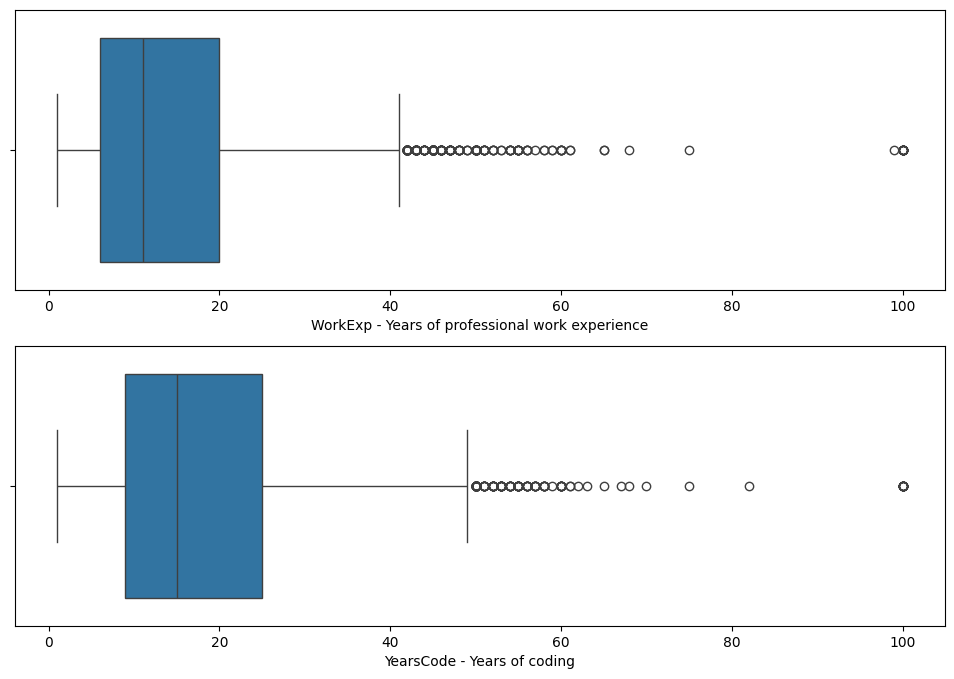

In [78]:
fig, ax = plt.subplots(2, 1, figsize=[12,8])
sns.boxplot(data=df_eda, x="WorkExp", ax=ax[0], color=base_color)
ax[0].set_xlabel("WorkExp - Years of professional work experience")
sns.boxplot(data=df_eda, x="YearsCode", ax=ax[1], color=base_color)
ax[1].set_xlabel("YearsCode - Years of coding");

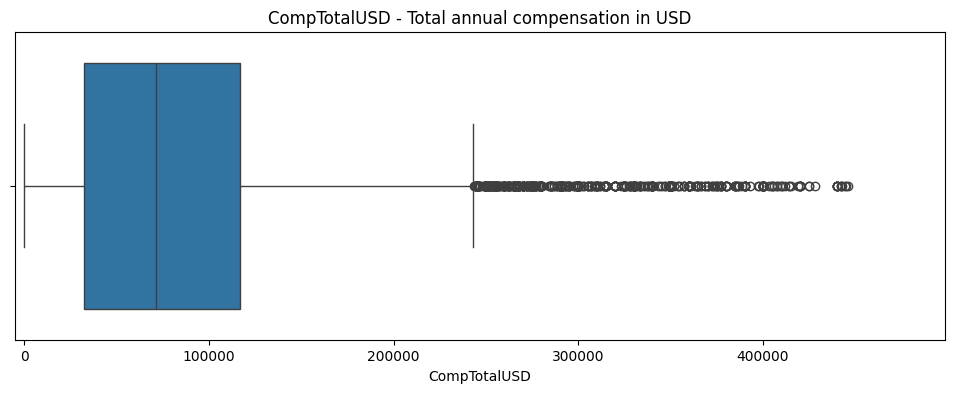

In [79]:
plt.figure(figsize=[12,4])
ax = sns.boxplot(data=df_eda, x="CompTotalUSD", color=base_color)
ax.set_title("CompTotalUSD - Total annual compensation in USD")
ax.set_xlim(0-5_000, new_max_comp_total_USD+5_0000);

Let's plot histograms to check the distribution of the quantitative variables.

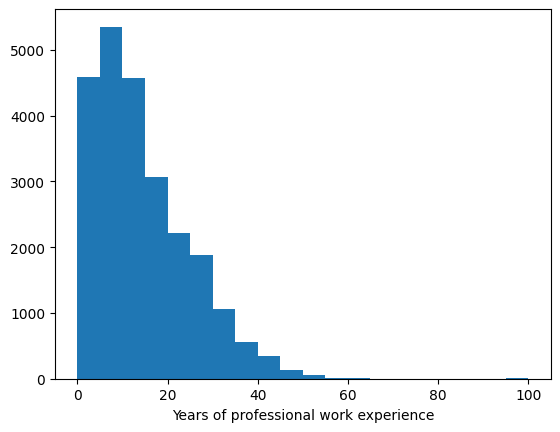

In [80]:
bins_size = 5
bins = np.arange(0, df_eda.WorkExp.max()+bins_size, bins_size)
plt.hist(data=df_eda, x="WorkExp", bins=bins)
plt.xlabel("Years of professional work experience");

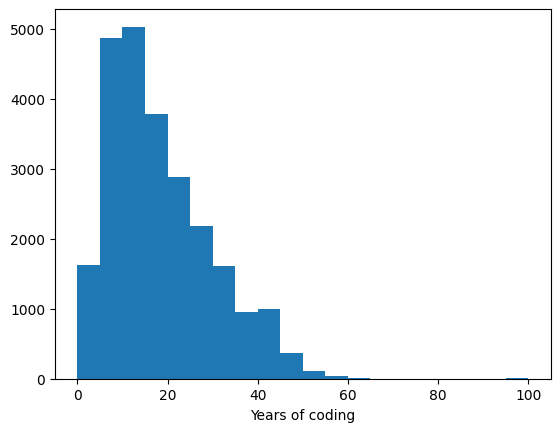

In [81]:
bins_size = 5
bins = np.arange(0, df_eda.YearsCode.max()+bins_size, bins_size)
plt.hist(data=df_eda, x="YearsCode", bins=bins)
plt.xlabel("Years of coding");

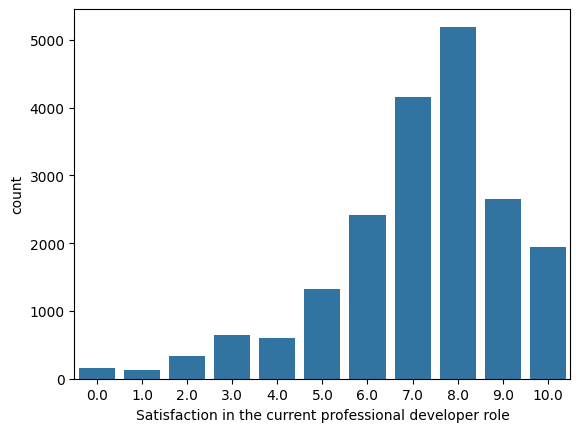

In [82]:
sns.countplot(data=df_eda, x="JobSat")
plt.xlabel("Satisfaction in the current professional developer role");

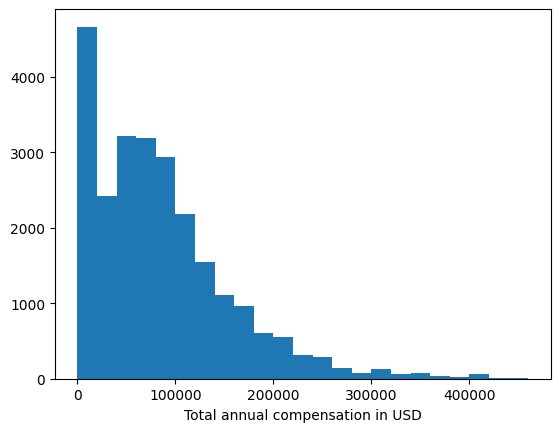

In [83]:
bins_size = 20_000
bins = np.arange(0, new_max_comp_total_USD + bins_size, bins_size).tolist()
plt.hist(data=df_eda, x="CompTotalUSD", bins=bins)
plt.xlabel("Total annual compensation in USD");

Let's see the distribution of countries.

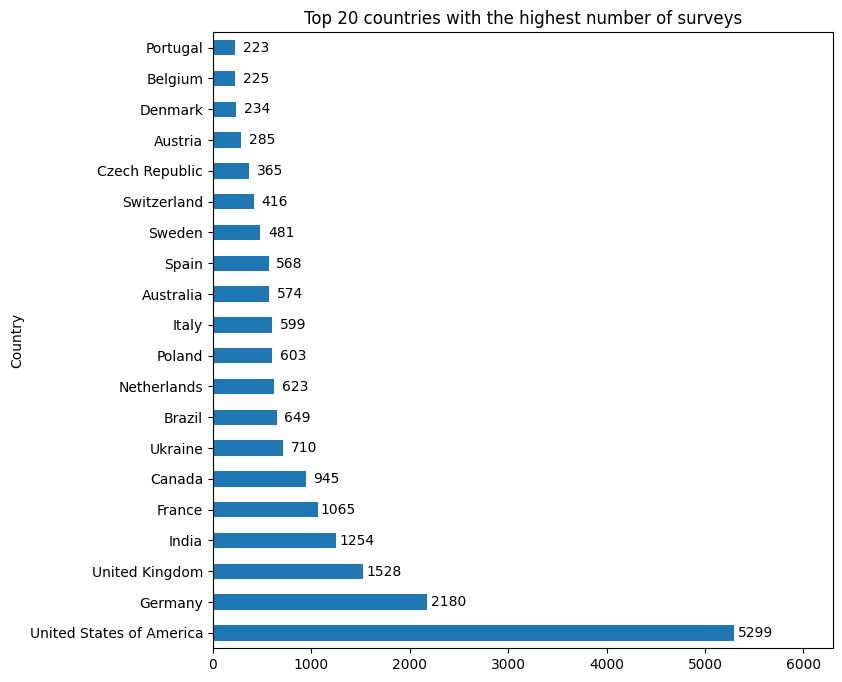

In [84]:
df_top_20 = df_eda.Country.value_counts().sort_values(ascending=False).head(20)

ax1 = df_top_20.plot(kind="barh", figsize=(8,8), title="Top 20 countries with the highest number of surveys")
ax1.set_xlim(0, df_top_20.max()+1_000)

for i, v in enumerate(df_top_20):
    ax1.annotate(str(v), (v, i), textcoords="offset points", xytext=(15, -3), ha="center", color="black");

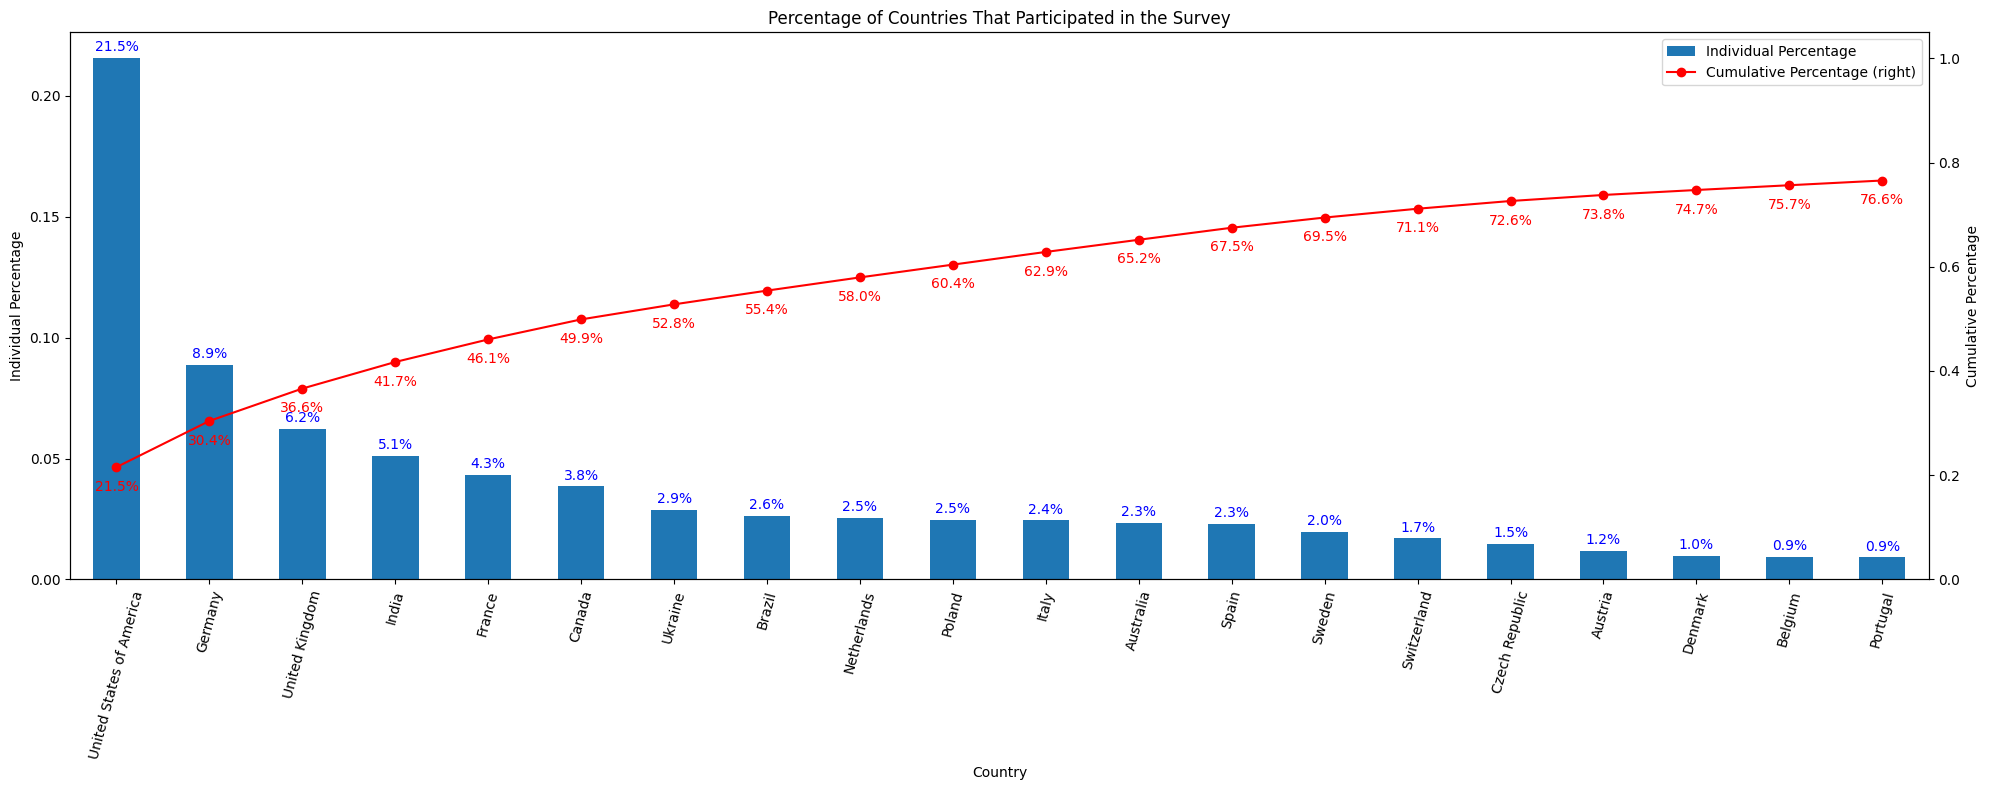

In [85]:
df_top_20 = df_eda.Country.value_counts(normalize=True).head(20)

plt.figure(figsize=(20,8))

ax1 = df_top_20.plot(kind="bar", grid=False, label="Individual Percentage", legend=True)
ax1.set_ylabel("Individual Percentage")
# ax1.grid(True, which="major", axis="y", linestyle="--", linewidth=0.5, color="lightgray")
# ax1.set_yticks(np.arange(0, df_top_20.max() + 0.05, 0.02))
# ax1.xaxis.grid(False)

df_top_20_cumsum = df_top_20.cumsum()
ax2 = df_top_20_cumsum.plot(kind="line", ax=ax1, secondary_y=True, color="red", marker="o", label="Cumulative Percentage", legend=True)

ax2.set_ylim(0, 1.05)
ax2.set_ylabel("Cumulative Percentage")

# ax1.legend(loc="upper left")
# ax2.legend(loc="upper right")

for i, v in enumerate(df_top_20):
    ax1.annotate(f"{v:.1%}", (i, v), textcoords="offset points", xytext=(0, 5), ha="center", color="blue")

for i, v in enumerate(df_top_20_cumsum):
    ax2.annotate(f"{v:.1%}", (i, v), textcoords="offset points", xytext=(0, -17), ha="center", color="red")

ax1.tick_params(axis="x", labelrotation=75)
ax2.tick_params(axis="x", labelrotation=75)

plt.title("Percentage of Countries That Participated in the Survey")

plt.tight_layout()
plt.show()

The top 20 countries represented approximately 75% of the total participants (considering only those who answered the nationality question).

### Bivariate Exploration

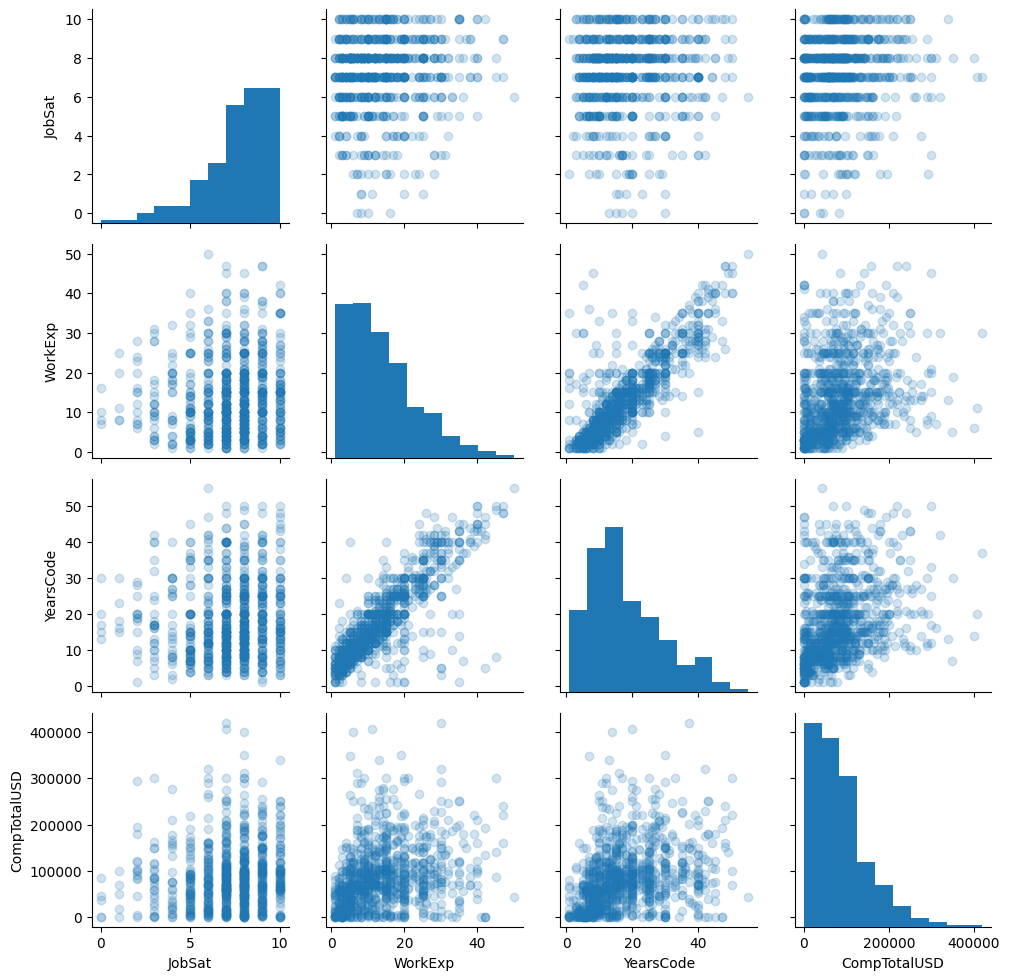

In [86]:
g = sns.PairGrid(data=df_eda.sample(1_000), vars=quant_vars)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha=1/5);

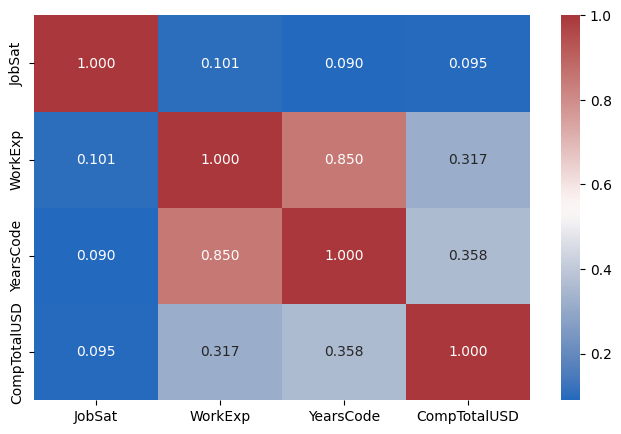

In [87]:
plt.figure(figsize=[8,5])
sns.heatmap(df_eda[quant_vars].corr(method="pearson"), annot=True, fmt=".3f", cmap="vlag");

The `YearsCode` and `WorkExp` have a strong positive relationships with each other. There aren't a linear relationship between the others variables.

In [88]:
def plot_box(df, column, list_numeric_vars):

    plt.figure(figsize=[8, 4*len(quant_vars)])
    for i, numeric_var in enumerate(list_numeric_vars, start=1):
        plt.subplot(len(list_numeric_vars), 1, i)
        sns.boxplot(data=df, y=column, x=numeric_var, color=base_color);


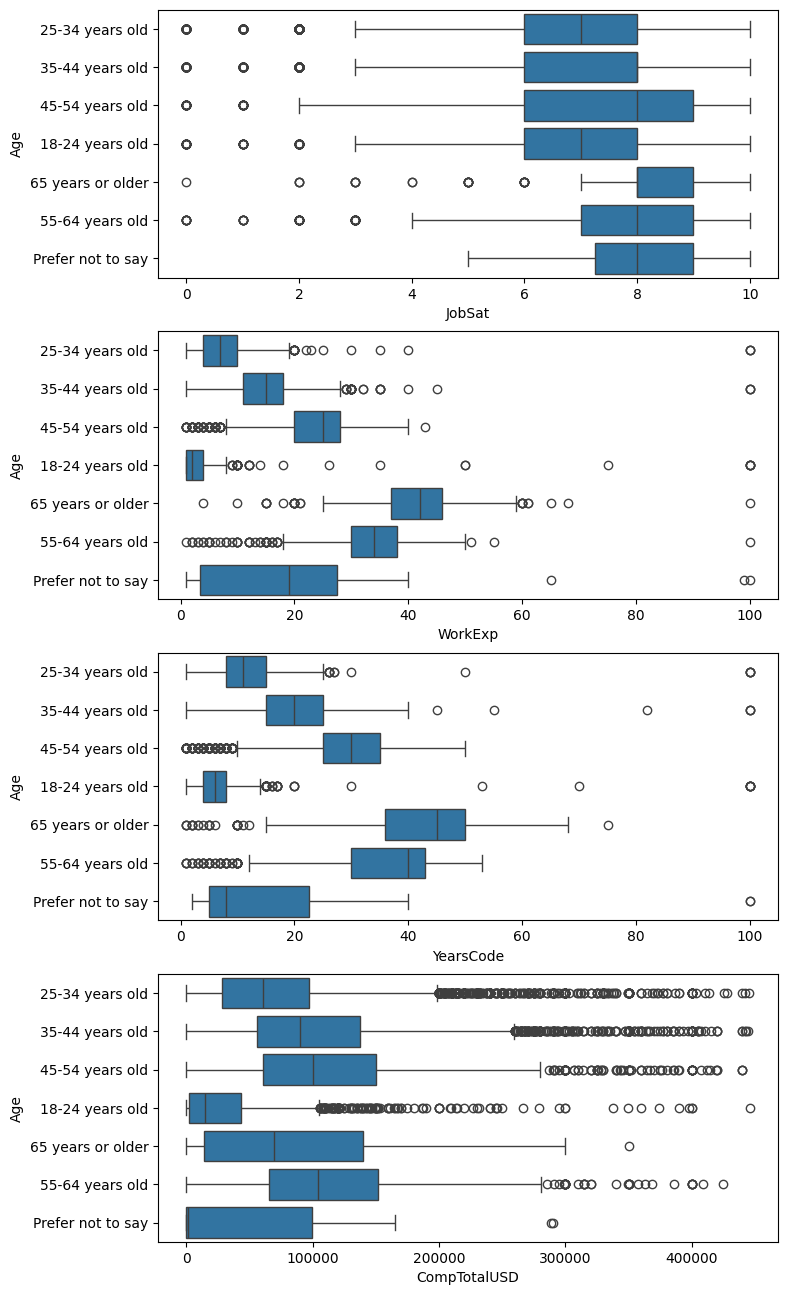

In [89]:
plot_box(df_eda, "Age", quant_vars)

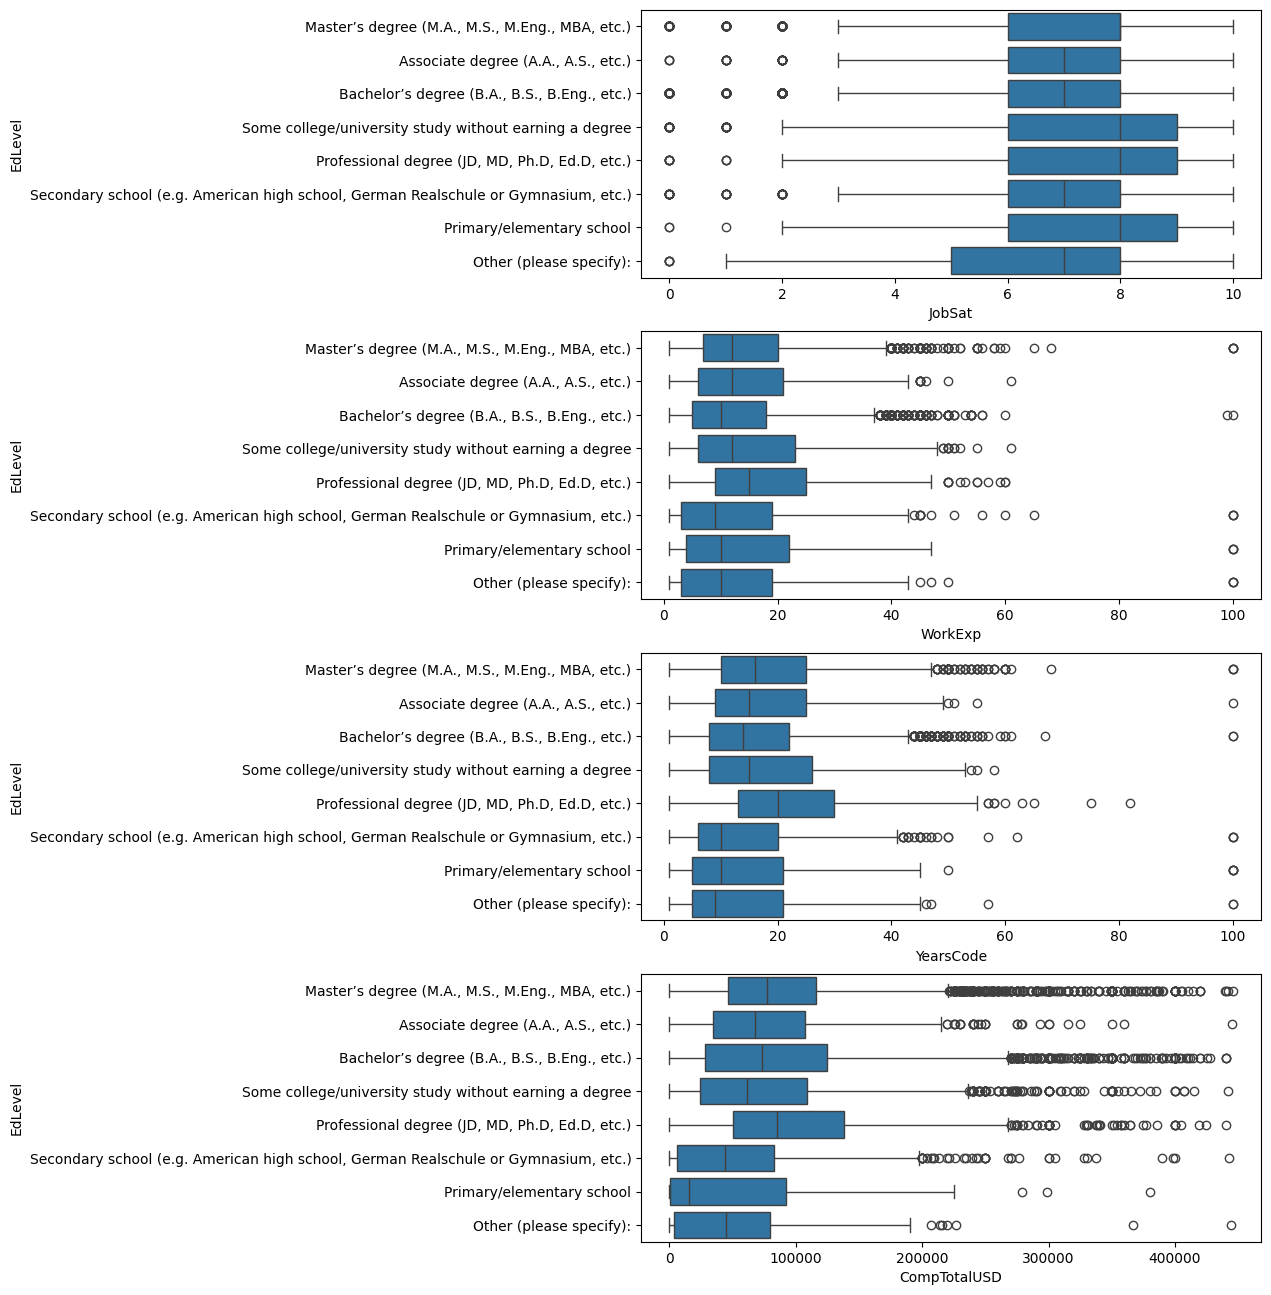

In [90]:
plot_box(df_eda, "EdLevel", quant_vars)

Let's look more in detail to the `CompTotalUSD` against the others numerical variables.

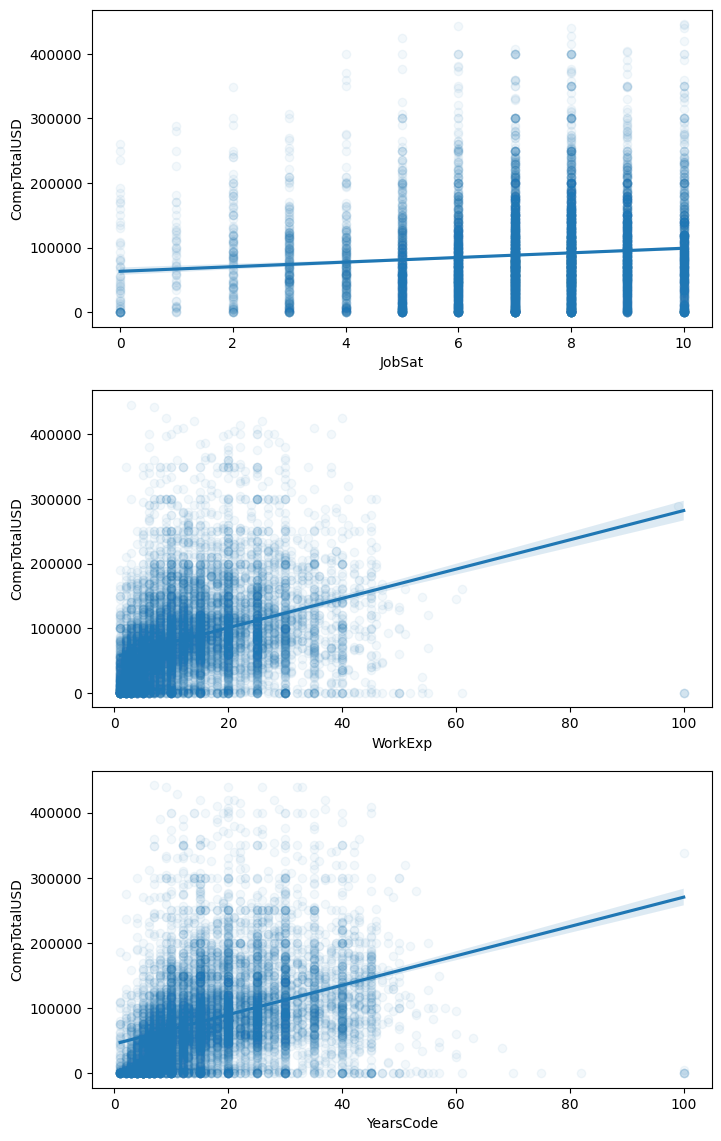

In [91]:
plt.figure(figsize=[8,14])
for i, var in enumerate(["JobSat", "WorkExp", "YearsCode"], start=1):
    plt.subplot(3, 1, i)
    sns.regplot(data=df_eda.sample(10000), x=var, y=f"CompTotalUSD", scatter_kws={"alpha": 1/20});


As the values in the variables `WorkExp`, `YearsCode`, and `JobSat` increase, the `CompTotalUSD` also increase.

### Data Preparation

#### Drop rows with total annual compensation (`CompTotalUSD`) as NULL

In [92]:
df_clean = df_clean.dropna(subset="CompTotalUSD").reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24839 entries, 0 to 24838
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              24839 non-null  int64  
 1   MainBranch              24839 non-null  object 
 2   Age                     24839 non-null  object 
 3   EdLevel                 24821 non-null  object 
 4   Employment              24839 non-null  object 
 5   WorkExp                 24093 non-null  float64
 6   LearnCodeChoose         24826 non-null  object 
 7   LearnCode               17794 non-null  object 
 8   LearnCodeAI             24807 non-null  object 
 9   YearsCode               24721 non-null  float64
 10  DevType                 24839 non-null  object 
 11  ICorPM                  21027 non-null  object 
 12  RemoteWork              21260 non-null  object 
 13  Industry                23285 non-null  object 
 14  JobSat                  19764 non-null

#### Missing values in quantitative variables

Since there are some outliers in the data, let's fill the missing data with the median.

In [93]:
df_clean.isnull().sum()[quant_vars]

JobSat          5075
WorkExp          746
YearsCode        118
CompTotalUSD       0
dtype: int64

In [94]:
df_clean[quant_vars].describe()

,JobSat,WorkExp,YearsCode,CompTotalUSD
count,19764.000000,24093.000000,24721.000000,2.483900e+04
mean,7.175724,13.714398,17.584119,2.236626e+70
std,1.982858,10.372551,11.306701,3.525011e+72
min,0.000000,1.000000,1.000000,0.000000e+00
25%,6.000000,6.000000,9.000000,3.300000e+04
50%,8.000000,11.000000,15.000000,7.211096e+04
75%,8.000000,20.000000,25.000000,1.200000e+05
max,10.000000,100.000000,100.000000,5.555556e+74


In [95]:
df_clean.fillna({
    "JobSat": df_clean.JobSat.median(),
    "WorkExp": df_clean.WorkExp.median(),
    "YearsCode": df_clean.YearsCode.median()
}, inplace=True)

In [96]:
df_clean.isnull().sum()[quant_vars]

JobSat          0
WorkExp         0
YearsCode       0
CompTotalUSD    0
dtype: int64

#### Remove outliers from `WorkExp` and `YearsCode`

Let's remove the outliers based on the $1.5 \times IQR$ rule.

In [97]:
def remove_outliers(df:pd.DataFrame, column:str, lower_bound=.25, upper_bound=.75) -> pd.DataFrame:
    q1 = df[column].quantile(lower_bound)
    q3 = df[column].quantile(upper_bound)
    iqr = q3 - q1
    step = 1.5 * iqr
    
    lower_bound = q1 - step
    upper_bound = q3 + step
    print(lower_bound, upper_bound)

    return df.loc[(df[column].isnull()) | (df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [98]:
df_clean = remove_outliers(df_clean, "WorkExp")
df_clean = remove_outliers(df_clean, "YearsCode")

-15.0 41.0
-13.5 46.5


In [99]:
_ = remove_outliers(df_clean, "CompTotalUSD")

-95563.71422286828 247272.8570381138


In [100]:
df_clean.describe()

,ResponseId,WorkExp,YearsCode,JobSat,CompTotalUSD
count,24399.000000,24399.000000,24399.000000,24399.000000,2.439900e+04
mean,22527.983565,13.054019,17.027091,7.332555,4.683007e+16
std,14356.893954,9.164934,10.394074,1.801231,7.256093e+18
min,1.000000,1.000000,1.000000,0.000000,0.000000e+00
25%,10355.500000,6.000000,9.000000,7.000000,3.300000e+04
50%,21024.000000,11.000000,15.000000,8.000000,7.200000e+04
75%,35486.500000,19.000000,24.000000,8.000000,1.187091e+05
max,49123.000000,41.000000,46.000000,10.000000,1.133378e+21


#### Winsorizing the `CompTotalUSD` variable

Since the standard $1.5 \times IQR$ rule for outlier detection returned negative lower bounds for the `CompTotalUSD` variable, we will instead remove data below the 5th and above 95th percentiles to effectively exclude implausible values, such as zero.

In [101]:
from scipy.stats.mstats import winsorize
winsorize(df_clean.CompTotalUSD, limits=[0.05, 0.05], inplace=True)

masked_array(data=[ 61449.43863377, 104743.36130757,  52557.74497363, ...,
                    71027.81719738,  58190.75628198,  46552.60502559],
             mask=False,
       fill_value=1e+20)

In [102]:
df_clean.describe()

,ResponseId,WorkExp,YearsCode,JobSat,CompTotalUSD
count,24399.000000,24399.000000,24399.000000,24399.000000,24399.000000
mean,22527.983565,13.054019,17.027091,7.332555,82892.043271
std,14356.893954,9.164934,10.394074,1.801231,63747.280775
min,1.000000,1.000000,1.000000,0.000000,204.153842
25%,10355.500000,6.000000,9.000000,7.000000,33000.000000
50%,21024.000000,11.000000,15.000000,8.000000,72000.000000
75%,35486.500000,19.000000,24.000000,8.000000,118709.142815
max,49123.000000,41.000000,46.000000,10.000000,230000.000000


#### Create a new feature to represent who currently work as a developer

Create a new feature with the following options from the `MainBranch` variable:
- "I am a developer by profession"
- "I am not primarily a developer, but I write code sometimes as part of my work/studies"

In [103]:
df_clean["IsDeveloper"] = 0
df_clean.loc[df_clean.MainBranch.isin(["I am a developer by profession", "I am not primarily a developer, but I write code sometimes as part of my work/studies"]), "IsDeveloper"] = 1

In [104]:
df_clean.IsDeveloper.value_counts()

IsDeveloper
1    22516
0     1883
Name: count, dtype: int64

#### Filter Only Employed Interviewees

Since we're interested in predicting the total annual compensation, we will only consider responses from the "Employed" or "Independent contractor, freelancer, or self-employed" categories in the Employment feature. Furthermore, we will standardize the latter category, renaming it simply to "freelancer."

In [105]:
df_clean.Employment.value_counts()

Employment
Employed                                                19424
Independent contractor, freelancer, or self-employed     3044
Student                                                  1022
Not employed                                              715
Retired                                                   130
I prefer not to say                                        64
Name: count, dtype: int64

In [106]:
df_clean = df_clean.loc[df_clean.Employment.isin(["Employed", "Independent contractor, freelancer, or self-employed"])].reset_index(drop=True)
df_clean.Employment.value_counts()

Employment
Employed                                                19424
Independent contractor, freelancer, or self-employed     3044
Name: count, dtype: int64

In [107]:
df_clean.Employment = df_clean.Employment.replace({"Independent contractor, freelancer, or self-employed": "Freelancer"})
df_clean.Employment.value_counts()

Employment
Employed      19424
Freelancer     3044
Name: count, dtype: int64

In [108]:
df_clean.Employment = df_clean.Employment.astype("category")
df_clean.Employment.dtype

CategoricalDtype(categories=['Employed', 'Freelancer'], ordered=False, categories_dtype=object)

#### Create feature of categories with `EdLevel` variable

In [109]:
df_clean.EdLevel.value_counts(dropna=False)

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          9926
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       6625
Some college/university study without earning a degree                                2568
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        1276
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    1009
Associate degree (A.A., A.S., etc.)                                                    732
Other (please specify):                                                                204
Primary/elementary school                                                              112
NaN                                                                                     16
Name: count, dtype: int64

In [110]:
mapper = {"Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor",
          "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master",
          "Some college/university study without earning a degree": "Some college",
          "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional",
          "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
          "Associate degree (A.A., A.S., etc.)": "Associate",
          "Other (please specify):": "Other",
          "Primary/elementary school": "Primary school"}

df_clean.EdLevel = df_clean.EdLevel.replace(mapper)
df_clean.EdLevel.value_counts(dropna=False)

EdLevel
Bachelor            9926
Master              6625
Some college        2568
Professional        1276
Secondary school    1009
Associate            732
Other                204
Primary school       112
NaN                   16
Name: count, dtype: int64

In [111]:
df_clean.EdLevel = df_clean.EdLevel.astype("category")
df_clean.EdLevel.dtype

CategoricalDtype(categories=['Associate', 'Bachelor', 'Master', 'Other', 'Primary school',
                  'Professional', 'Secondary school', 'Some college'],
, ordered=False, categories_dtype=object)

#### Aggregate the `LearnCodeChoose` variable categories into a binary ('Yes'/'No') variable.

In [112]:
df_clean.LearnCodeChoose.value_counts(dropna=False)

LearnCodeChoose
Yes, I am not new to coding but am learning new coding techniques or programming language      15589
No, I am not new to coding and did not learn new coding techniques or programming languages     6544
Yes, I am new to coding or currently a student                                                   325
NaN                                                                                               10
Name: count, dtype: int64

In [113]:
df_clean.loc[df_clean.LearnCodeChoose.str.contains("yes,", case=False, na=False), "StudingCode"] = "Yes"
df_clean.loc[df_clean.LearnCodeChoose.str.contains("no,", case=False, na=False), "StudingCode"] = "No"

#### Create features with methods of learn coding

In [114]:
mapper = {"Online Courses or Certification (includes all media types)": "LearnCode_Online Courses",
          "Other online resources (e.g. standard search, forum, online community)": "LearnCode_Other online resources",
          "Books / Physical media": "LearnCode_Physical media",
          "Videos (not associated with specific online course or certification)": "LearnCode_Videos",
          "Stack Overflow or Stack Exchange": "LearnCode_Stack Overflow",
          "Technical documentation (is generated for/by the tool or system)": "LearnCode_Technical documentation",
          "AI CodeGen tools or AI-enabled apps": "LearnCode_AI Learning tools",
          "Colleague or on-the-job training": "LearnCode_Peer training",
          "Blogs or podcasts": "LearnCode_Digital content",
          "Games or coding challenges": "LearnCode_Games",
          "School (i.e., University, College, etc)": "LearnCode_School",
          "Coding Bootcamp": "LearnCode_Bootcamp",
          "Other (please specify):": "LearnCode_Other",
          "NANs": "LearnCode_nan"}

In [115]:
for col in mapper.values():
    df_clean[col] = 0

In [116]:
for i, row in df_clean.LearnCode.str.split(";").items():
    if not isinstance(row, list):
        df_clean.loc[i, "LearnCode_nan"] = 1 # type: ignore
        continue
    for item in row:
        value = mapper[item.strip()]
        df_clean.loc[i, value] = 1 # type: ignore

#### Create feature to represent learning AI

In [117]:
df_clean.LearnCodeAI.value_counts(dropna=False)

LearnCodeAI
Yes, I learned how to use AI-enabled tools required for my job or to benefit my career                                8909
Yes, I learned how to use AI-enabled tools for my personal curiosity and/or hobbies                                   6787
No, I learned something that was not related to AI or AI enablement as required for my job or to benefit my career    2405
No, I learned something that was not related to AI or AI enablement for my personal curiosity and/or hobbies          2247
No, I didn't spend time learning in the past year                                                                     2095
NaN                                                                                                                     25
Name: count, dtype: int64

In [118]:
df_clean.loc[df_clean.LearnCodeAI.str.contains("yes,", case=False, na=False), "LearningAI"] = "Yes"
df_clean.loc[df_clean.LearnCodeAI.str.contains("no,", case=False, na=False), "LearningAI"] = "No"

In [119]:
df_clean.LearningAI.value_counts(dropna=False)

LearningAI
Yes    15696
No      6747
NaN       25
Name: count, dtype: int64

In [120]:
df_clean.LearningAI = df_clean.LearningAI.astype("category")
df_clean.LearningAI.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

#### Rename categories of variable `ICorPM`

In [121]:
df_clean.ICorPM.value_counts(dropna=False)

ICorPM
Individual contributor    17279
People manager             2971
NaN                        2218
Name: count, dtype: int64

In [122]:
df_clean.ICorPM = df_clean.ICorPM.replace({"Individual contributor": "Contributor", "People manager": "Manager"})
df_clean.ICorPM.value_counts(dropna=False)

ICorPM
Contributor    17279
Manager         2971
NaN             2218
Name: count, dtype: int64

In [123]:
df_clean.ICorPM = df_clean.ICorPM.astype("category")
df_clean.ICorPM.dtype

CategoricalDtype(categories=['Contributor', 'Manager'], ordered=False, categories_dtype=object)

#### Create categories of remote work

Join both hybrid catgories into only one category called `Hybrid `, and rename the category "Your choice (very flexible, you can come in when you want or just as needed)" to only `Flexible`.

In [124]:
df_clean.RemoteWork.value_counts(dropna=False)

RemoteWork
Remote                                                                          6927
Hybrid (some remote, leans heavy to in-person)                                  4119
Hybrid (some in-person, leans heavy to flexibility)                             3711
In-person                                                                       3080
Your choice (very flexible, you can come in when you want or just as needed)    2637
NaN                                                                             1994
Name: count, dtype: int64

In [125]:
df_clean.loc[df_clean.RemoteWork.str.contains("hybrid", case=False, na=False), "RemoteWork"] = "Hybrid"
df_clean.RemoteWork = df_clean.RemoteWork.replace({"Your choice (very flexible, you can come in when you want or just as needed)": "Flexible"})
df_clean.RemoteWork.value_counts(dropna=False)

RemoteWork
Hybrid       7830
Remote       6927
In-person    3080
Flexible     2637
NaN          1994
Name: count, dtype: int64

In [126]:
df_clean.RemoteWork = df_clean.RemoteWork.astype("category")
df_clean.RemoteWork.dtype

CategoricalDtype(categories=['Flexible', 'Hybrid', 'In-person', 'Remote'], ordered=False, categories_dtype=object)

#### Rename category in Industry variable

In [127]:
mapper = {"Software Development": "Tech",
    "Other:": "Other",
    "Fintech": "Financial",
    "Internet, Telecomm or Information Services": "Tech",
    "Healthcare": "Health",
    "Banking/Financial Services": "Financial",
    "Manufacturing": "Manufacturing",
    "Government": "Government",
    "Retail and Consumer Services": "Retail",
    "Higher Education": "Education",
    "Transportation, or Supply Chain": "Logistics",
    "Media & Advertising Services": "Media",
    "Energy": "Energy",
    "Computer Systems Design and Services": "Tech",
    "Insurance": "Insurance"}

In [128]:
df_clean.Industry = df_clean.Industry.replace(mapper)
df_clean.Industry.value_counts(dropna=False)

Industry
Tech             12195
Financial         2207
Other             1796
Health            1001
Manufacturing      882
Government         845
Retail             760
Education          700
Logistics          636
Media              560
Energy             516
Insurance          331
NaN                 39
Name: count, dtype: int64

In [129]:
df_clean.Industry = df_clean.Industry.astype("category")
df_clean.Industry.dtype

CategoricalDtype(categories=['Education', 'Energy', 'Financial', 'Government', 'Health',
                  'Insurance', 'Logistics', 'Manufacturing', 'Media', 'Other',
                  'Retail', 'Tech'],
, ordered=False, categories_dtype=object)

#### Simplify categories in `Age`

In [130]:
df_clean.Age.unique()

array(['25-34 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '55-64 years old', 'Prefer not to say',
       '65 years or older'], dtype=object)

In [131]:
mapper = {"25-34 years old": "25-34",
          "35-44 years old": "35-44",
          "18-24 years old": "18-24",
          "45-54 years old": "45-54",
          "55-64 years old": "55-64",
          "65 years or older": "65-",
          "Prefer not to say": "Other"}

In [132]:
df_clean.Age = df_clean.Age.replace(mapper)
df_clean.Age.value_counts()

Age
25-34    8309
35-44    7452
45-54    3333
18-24    2088
55-64    1181
65-        88
Other      17
Name: count, dtype: int64

In [133]:
df_clean.Age = df_clean.Age.astype("category")
df_clean.Age.dtype

CategoricalDtype(categories=['18-24', '25-34', '35-44', '45-54', '55-64', '65-', 'Other'], ordered=False, categories_dtype=object)

#### Convert variables to data type `category`

Columns to convert:
- StudingCode
- LanguageChoice
- DatabaseChoice
- PlatformChoice
- AIModelsChoice

In [134]:
df_clean.StudingCode = df_clean.StudingCode.astype("category")
df_clean.StudingCode.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

In [135]:
df_clean.LanguageChoice = df_clean.LanguageChoice.astype("category")
df_clean.LanguageChoice.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

In [136]:
df_clean.DatabaseChoice = df_clean.DatabaseChoice.astype("category")
df_clean.DatabaseChoice.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

In [137]:
df_clean.PlatformChoice = df_clean.PlatformChoice.astype("category")
df_clean.PlatformChoice.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

In [138]:
df_clean.AIModelsChoice = df_clean.AIModelsChoice.astype("category")
df_clean.AIModelsChoice.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

#### Feature with interviewees that belive AI as a threat

In [139]:
df_clean.AIThreat.value_counts(dropna=False)

AIThreat
No              14960
I'm not sure     4445
Yes              3049
NaN                14
Name: count, dtype: int64

In [140]:
mapper = {"I'm not sure": "Unsure"}

df_clean.AIThreat = df_clean.AIThreat.replace(mapper)
df_clean.AIThreat.value_counts(dropna=False)

AIThreat
No        14960
Unsure     4445
Yes        3049
NaN          14
Name: count, dtype: int64

In [141]:
df_clean.AIThreat = df_clean.AIThreat.astype("category")
df_clean.AIThreat.dtype

CategoricalDtype(categories=['No', 'Unsure', 'Yes'], ordered=False, categories_dtype=object)

#### Feature to represent use of AI tools

In [142]:
df_clean.AISelect.value_counts(dropna=False)

AISelect
Yes, I use AI tools daily                      10876
Yes, I use AI tools weekly                      3968
No, and I don't plan to                         3079
Yes, I use AI tools monthly or infrequently     2873
No, but I plan to soon                           985
NaN                                              687
Name: count, dtype: int64

In [143]:
df_clean.loc[df_clean.AISelect.str.contains("yes,", case=False, na=False), "AIUse"] = "Yes"
df_clean.loc[df_clean.AISelect.str.contains("no,", case=False, na=False), "AIUse"] = "No"

In [144]:
df_clean.AIUse.value_counts(dropna=False)

AIUse
Yes    17717
No      4064
NaN      687
Name: count, dtype: int64

In [145]:
df_clean.AIUse = df_clean.AIUse.astype("category")
df_clean.AIUse.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

#### Feature to represent use of AI agents

In [146]:
df_clean.AIAgents.value_counts(dropna=False)

AIAgents
No, and I don't plan to                                  7543
No, but I plan to                                        3708
Yes, I use AI agents at work daily                       3074
No, I use AI exclusively in copilot/autocomplete mode    3062
Yes, I use AI agents at work weekly                      1960
Yes, I use AI agents at work monthly or infrequently     1652
NaN                                                      1469
Name: count, dtype: int64

In [147]:
df_clean.loc[df_clean.AIAgents.str.contains("yes,", case=False, na=False), "AIAgentsUse"] =  "Yes"
df_clean.loc[df_clean.AIAgents.str.contains("no,", case=False, na=False), "AIAgentsUse"] = "No"

In [148]:
df_clean.AIAgentsUse.value_counts(dropna=False)

AIAgentsUse
No     14313
Yes     6686
NaN     1469
Name: count, dtype: int64

In [149]:
df_clean.AIAgentsUse = df_clean.AIAgentsUse.astype("category")
df_clean.AIAgentsUse.dtype

CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)

#### Country variable

Since there are so many countries in the survey, we will aggregate those outside the top 20 most represented countries into a single category labeled 'Other'.

In [150]:
df_clean.Country.isnull().sum()

np.int64(0)

In [151]:
df_clean.Country.value_counts(normalize=True).head(20).sum()

np.float64(0.7659782802207585)

In [152]:
countries = df_clean.Country.value_counts().head(20).index
len(countries)

20

In [153]:
df_clean.loc[~df_clean.Country.isin(countries), "Country"] = "Other"

In [154]:
df_clean.Country.value_counts()

Country
Other                       5258
United States of America    4824
Germany                     1954
United Kingdom              1384
India                       1103
France                       962
Canada                       848
Ukraine                      680
Brazil                       601
Netherlands                  584
Poland                       566
Italy                        560
Spain                        529
Australia                    522
Sweden                       457
Switzerland                  388
Czech Republic               345
Austria                      269
Denmark                      213
Belgium                      211
Portugal                     210
Name: count, dtype: int64

In [155]:
df_clean.Country = df_clean.Country.astype("category")
df_clean.Country.dtype

CategoricalDtype(categories=['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
                  'Czech Republic', 'Denmark', 'France', 'Germany', 'India',
                  'Italy', 'Netherlands', 'Other', 'Poland', 'Portugal',
                  'Spain', 'Sweden', 'Switzerland', 'Ukraine',
                  'United Kingdom', 'United States of America'],
, ordered=False, categories_dtype=object)

#### Remove 'Retired' category in `DevType`

In [156]:
df_clean = df_clean[df_clean.DevType != "Retired"]

In [157]:
"Retired" in df_clean.DevType.unique()

False

### Feature selection

#### Select the prepared columns

In [158]:
features = ["Age", 
"EdLevel",
"Employment",
"WorkExp",
"YearsCode",
"DevType", 
"ICorPM", 
"RemoteWork", 
"Industry", 
"JobSat", 
"AIThreat",
"Country",
"LanguageChoice",
"DatabaseChoice",
"PlatformChoice",
"AIModelsChoice",
"IsDeveloper", 
"LearningAI",
"AIUse",
"AIAgentsUse",
"StudingCode",
"LearnCode_Online Courses",
"LearnCode_Other online resources", 
"LearnCode_Physical media", 
"LearnCode_Videos",
"LearnCode_Stack Overflow", 
"LearnCode_Technical documentation", 
"LearnCode_AI Learning tools",
"LearnCode_Peer training", 
"LearnCode_Digital content", 
"LearnCode_Games", 
"LearnCode_School",
"LearnCode_Bootcamp",
"LearnCode_Other",
"CompTotalUSD"]

In [159]:
df_final = df_clean[features].copy()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22460 entries, 0 to 22467
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                22460 non-null  category
 1   EdLevel                            22444 non-null  category
 2   Employment                         22460 non-null  category
 3   WorkExp                            22460 non-null  float64 
 4   YearsCode                          22460 non-null  float64 
 5   DevType                            22460 non-null  object  
 6   ICorPM                             20248 non-null  category
 7   RemoteWork                         20472 non-null  category
 8   Industry                           22421 non-null  category
 9   JobSat                             22460 non-null  float64 
 10  AIThreat                           22446 non-null  category
 11  Country                            22460 non-n

#### Create dummy features

Columns to create dummy variables:
- Age
- EdLevel
- StudingCode
- Employment
- ICorPM
- RemoteWork
- Industry
- AIThreat
- Country
- LanguageChoice
- DatabaseChoice
- PlatformChoice
- AIModelsChoice
- LearningAI
- AIUse
- AIAgentsUse

In [160]:
columns_dummy = list(df_final.select_dtypes(include="category").columns)

In [161]:
df_final[columns_dummy].isnull().sum()

Age                  0
EdLevel             16
Employment           0
ICorPM            2212
RemoteWork        1988
Industry            39
AIThreat            14
Country              0
LanguageChoice    1396
DatabaseChoice    1584
PlatformChoice    1818
AIModelsChoice    2442
LearningAI          25
AIUse              685
AIAgentsUse       1468
StudingCode         10
dtype: int64

For the columns with null values, I won't drop any of the dummy columns.

In [162]:
for col in columns_dummy:
    if col == "DevType":
        continue
    df_final = pd.get_dummies(data=df_final, columns=[col], prefix=[col], drop_first=(df_final[col].isnull().sum() == 0), dtype=int) # type: ignore

In [163]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22460 entries, 0 to 22467
Data columns (total 91 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   WorkExp                            22460 non-null  float64
 1   YearsCode                          22460 non-null  float64
 2   DevType                            22460 non-null  object 
 3   JobSat                             22460 non-null  float64
 4   IsDeveloper                        22460 non-null  int64  
 5   LearnCode_Online Courses           22460 non-null  int64  
 6   LearnCode_Other online resources   22460 non-null  int64  
 7   LearnCode_Physical media           22460 non-null  int64  
 8   LearnCode_Videos                   22460 non-null  int64  
 9   LearnCode_Stack Overflow           22460 non-null  int64  
 10  LearnCode_Technical documentation  22460 non-null  int64  
 11  LearnCode_AI Learning tools        22460 non-null  int64  


#### Drop features based on correlation

In [164]:
def get_correlated_features(df: pd.DataFrame, threshold: float = 0.9) -> Tuple[List, List]:
    correlated_features = []
    features_to_remove = set()
    
    correlation_matrix = df.corr(numeric_only=True)
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # type: ignore
                colname = correlation_matrix.columns[i]
                correlated_features.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
                features_to_remove.add(colname)
    
    return correlated_features, list(features_to_remove)

In [165]:
correlated_features, features_to_remove = get_correlated_features(df_final, threshold=.9)

In [166]:
correlated_features

[('LearningAI_Yes', 'LearningAI_No'),
 ('AIUse_Yes', 'AIUse_No'),
 ('StudingCode_Yes', 'StudingCode_No')]

In [167]:
features_to_remove

['AIUse_Yes', 'LearningAI_Yes', 'StudingCode_Yes']

In [168]:
# df_final = df_final.drop(features_to_remove, axis=1)
# df_final.columns

#### Drop features based on Variance

In [169]:
from sklearn.feature_selection import VarianceThreshold

def get_features_below_variance_threshold(df: pd.DataFrame, threshold: Union[int, float]) -> List:
    sel_variance = VarianceThreshold(threshold=threshold)
    _ = sel_variance.fit_transform(df)
    return list(df.columns[~sel_variance.get_support()])

In [170]:
def get_boolean_cols(df: pd.DataFrame) -> List:
    bool_cols = df.isin([0,1]).all()
    return list(bool_cols[bool_cols].index)

In [171]:
bool_cols = get_boolean_cols(df_final)
len(bool_cols)

86

In [172]:
p = .9
variance_boolean_col = p * (1 - p)
variance_remove = get_features_below_variance_threshold(df_final[bool_cols], threshold=variance_boolean_col)
len(variance_remove)

44

In [173]:
# df_final = df_final.drop(variance_remove, axis=1)
# df_final.info()

<a id="modeling"></a>
## Modeling

In [174]:
from sklearn.model_selection import (train_test_split, 
                                     KFold, 
                                     GridSearchCV)
from sklearn.metrics import (explained_variance_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             root_mean_squared_error)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import TargetEncoder

from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

seed = 1

In [175]:
def plot_top_feature_importance(model, df: pd.DataFrame, top_n: int =10, figsize=[6,6]):
    
    features = df.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]

    plt.figure(figsize=figsize)
    plt.barh(range(len(indices)), importances[indices], color="b", align="center")
    plt.title(f"Top {top_n} Feature Importances")
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel("Relative Importance");


In [176]:
def plot_predicted_vs_true_price(y_pred: Dict[str, np.ndarray], y_true: np.ndarray, title: str, figsize=[16,8], fontsize=14):

    plt.figure(figsize=figsize)
    
    data = {"Real": y_true}
    data.update(y_pred)
    
    df = pd.DataFrame(data=data)
    df.sort_values("Real", ascending=True, inplace=True)
    df = df.reset_index(drop=True)

    plt.plot(df)
    plt.title(title, fontsize=fontsize)
    plt.legend([f"{k} Price" if k == "Real" else f"{k} Predicted price" for k in data.keys()], fontsize=fontsize)
    plt.ylabel("$ Price (USD)", fontsize=fontsize)
    plt.xlabel("Observations ordered by price", fontsize=fontsize)


In [177]:
X, y = df_final.drop("CompTotalUSD", axis=1), df_final.CompTotalUSD

### Train-Test split

In [178]:
X_training, X_test, y_training, y_test = train_test_split(X, y, random_state=seed, test_size=0.25)
print("Test set X", X_test.shape)
print("Test set y", y_test.shape)

Test set X (5615, 90)
Test set y (5615,)


In [179]:
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, random_state=seed, test_size=0.33)

print("Train set X", X_train.shape)
print("Train set y", y_train.shape)
print("Validation set X", X_val.shape)
print("Validation set y", y_val.shape)

Train set X (11286, 90)
Train set y (11286,)
Validation set X (5559, 90)
Validation set y (5559,)


In [180]:
categorical_features = ["DevType"]

numerical_features = X_training.select_dtypes(include=np.number).columns.tolist()
numerical_features = [col for col in numerical_features if col not in categorical_features]

categorical_processor = TargetEncoder(categories="auto", target_type="continuous", smooth="auto", cv=5, shuffle=True, random_state=seed)

preprocessor = ColumnTransformer(transformers=[("target_encoder_devtype", categorical_processor, categorical_features), ("numerical_passthrough", "passthrough", numerical_features)], remainder="passthrough")

pipeline_steps = [("preprocessor", preprocessor)]

### Linear Regression

In [ ]:
param_grid = {
    "linear_regression__fit_intercept": [True, False], 
    "linear_regression__positive": [True, False]
}

linear_model = LinearRegression()

linear_pipeline = Pipeline(steps=pipeline_steps + [("linear_regression", linear_model)])

In [ ]:
linear_cv = KFold(n_splits=5, shuffle=True)

linear_grid_search = GridSearchCV(
    estimator=linear_pipeline,
    param_grid=param_grid,
    cv=linear_cv,
    scoring="neg_root_mean_squared_error",
    return_train_score=True,
    n_jobs=-1
)

linear_grid_search.fit(X_training, y_training)

linear_model_cv_gs_results = pd.DataFrame(linear_grid_search.cv_results_)

print("Average scoring on train set: {:.3f} +/- {:.3f}".format(linear_model_cv_gs_results[linear_model_cv_gs_results.rank_test_score == 1].mean_train_score.values[0], linear_model_cv_gs_results[linear_model_cv_gs_results.rank_test_score == 1].std_train_score.values[0])) 
print("Average scoring on validation set: {:.3f} +/- {:.3f}".format(linear_model_cv_gs_results[linear_model_cv_gs_results.rank_test_score == 1].mean_test_score.values[0], linear_model_cv_gs_results[linear_model_cv_gs_results.rank_test_score == 1].std_test_score.values[0]))

print()

linear_cv_gs_best_params = linear_grid_search.best_params_
print("Best hyperparameters:", linear_cv_gs_best_params)

Average scoring on train set: -42043.475 +/- 192.327
Average scoring on validation set: -42390.629 +/- 744.209

Best hyperparameters: {'linear_regression__fit_intercept': False, 'linear_regression__positive': False}


In [ ]:
# linear_cv_gs_best_params = {'linear_regression__fit_intercept': False, 'linear_regression__positive': False}

In [183]:
linear_model.set_params(fit_intercept = linear_cv_gs_best_params["linear_regression__positive"],
                        positive = linear_cv_gs_best_params["linear_regression__positive"])

linear_pipeline.fit(X_training, y_training)

y_pred_linear = linear_pipeline.predict(X_test)

print("R-squared on training set: {:.3f}".format(linear_pipeline.score(X_training, y_training)))
print("R-squared on test set: {:.3f}".format(linear_pipeline.score(X_test, y_test)))

print("Explained variance score: {:.3f}".format(explained_variance_score(y_test, y_pred_linear)))
print("Mean absolute error (MAE): {:.3f}".format(mean_absolute_error(y_test, y_pred_linear)))
print("Mean squared error (MSE): {:.3f}".format(mean_squared_error(y_test, y_pred_linear)))
print("Root mean squared error (RMSE): {:.3f}".format(root_mean_squared_error(y_test, y_pred_linear)))

R-squared on training set: 0.548
R-squared on test set: 0.524
Explained variance score: 0.525
Mean absolute error (MAE): 31360.114
Mean squared error (MSE): 1886789346.394
Root mean squared error (RMSE): 43437.189


In [ ]:
param_grid = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

linear_model = LinearRegression()

linear_cv = KFold(n_splits=5, shuffle=True)

linear_grid_search = GridSearchCV(
    estimator=linear_model,
    param_grid=param_grid,
    cv=linear_cv,
    scoring='neg_root_mean_squared_error',
    return_train_score=True,
    n_jobs=-1
)

linear_grid_search.fit(X_training, y_training)

linear_model_cv_gs_results = pd.DataFrame(linear_grid_search.cv_results_)

print("Average scoring on train set: {:.3f} +/- {:.3f}".format(linear_model_cv_gs_results[linear_model_cv_gs_results.rank_test_score == 1].mean_train_score.values[0], linear_model_cv_gs_results[linear_model_cv_gs_results.rank_test_score == 1].std_train_score.values[0])) 
print("Average scoring on validation set: {:.3f} +/- {:.3f}".format(linear_model_cv_gs_results[linear_model_cv_gs_results.rank_test_score == 1].mean_test_score.values[0], linear_model_cv_gs_results[linear_model_cv_gs_results.rank_test_score == 1].std_test_score.values[0]))

print()

linear_cv_gs_best_params = linear_grid_search.best_params_
print("Best hyperparameters:", linear_cv_gs_best_params)

In [ ]:
linear_model.set_params(fit_intercept = linear_cv_gs_best_params["fit_intercept"],
                        positive = linear_cv_gs_best_params["positive"])

linear_model.fit(X_training, y_training)

y_pred_linear = linear_model.predict(X_test)

print("R-squared on training set: {:.3f}".format(linear_model.score(X_training, y_training)))
print("R-squared on test set: {:.3f}".format(linear_model.score(X_test, y_test)))

print("Explained variance score: {:.3f}".format(explained_variance_score(y_test, y_pred_linear)))
print("Mean absolute error (MAE): {:.3f}".format(mean_absolute_error(y_test, y_pred_linear)))
print("Mean squared error (MSE): {:.3f}".format(mean_squared_error(y_test, y_pred_linear)))
print("Root mean squared error (RMSE): {:.3f}".format(root_mean_squared_error(y_test, y_pred_linear)))

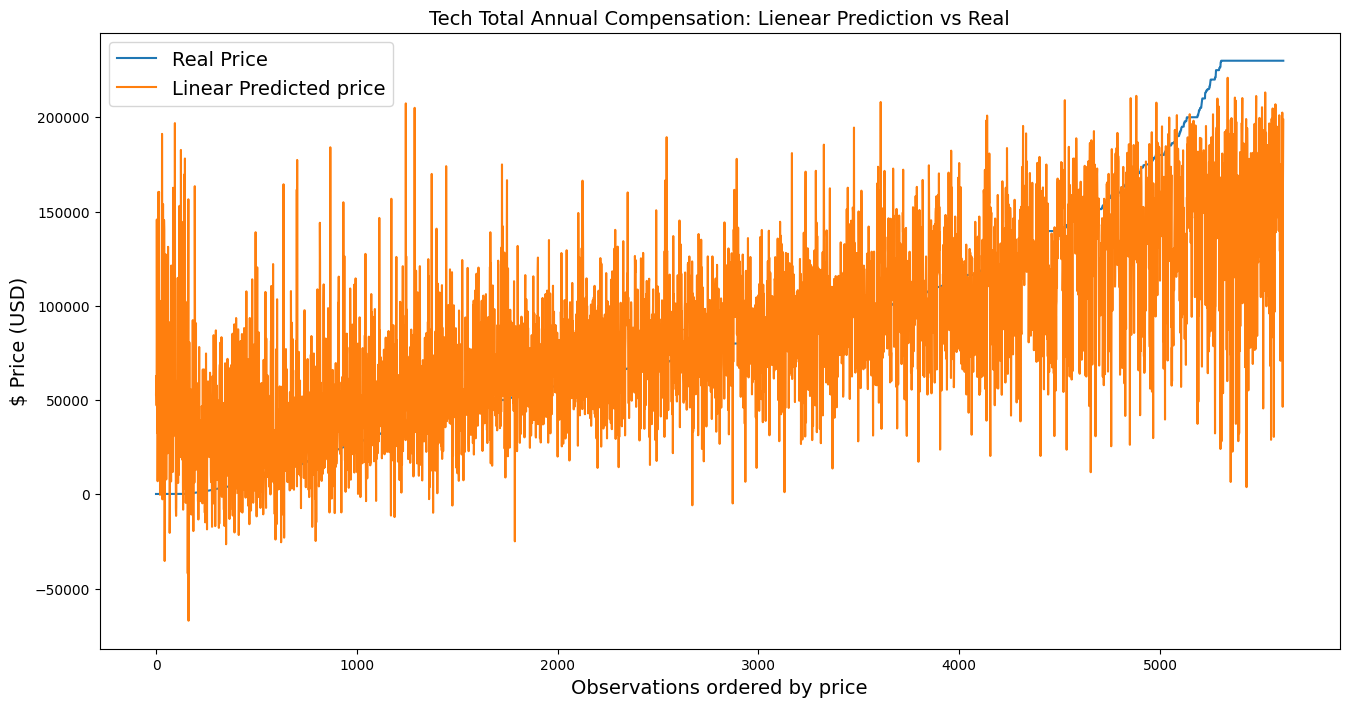

In [184]:
plot_predicted_vs_true_price(y_pred={"Linear": y_pred_linear}, y_true=y_test, title="Tech Total Annual Compensation: Lienear Prediction vs Real")

### Random Forest model

In [ ]:
rf_params = {"rf_regression__n_estimators": [50, 100, 500],
             "rf_regression__max_features": [5, 13, 20, 30, 50],
             "rf_regression__max_depth": [2, 5, 10, 50],
             "rf_regression__min_samples_split": [2, 8, 15, 30]}

rf_model = RandomForestRegressor(random_state=seed)

rf_pipeline = Pipeline(steps=pipeline_steps + [("rf_regression", rf_model)])

In [ ]:
rf_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

rf_grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_params,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    return_train_score=True,
    cv=rf_cv
)

rf_grid_search.fit(X_training, y_training)

rf_model_cv_gs_results = pd.DataFrame(rf_grid_search.cv_results_)

print("Average scoring on train set: {:.3f} +/- {:.3f}".format(rf_model_cv_gs_results[rf_model_cv_gs_results.rank_test_score == 1].mean_train_score.values[0], rf_model_cv_gs_results[rf_model_cv_gs_results.rank_test_score == 1].std_train_score.values[0])) 
print("Average scoring on validation set: {:.3f} +/- {:.3f}".format(rf_model_cv_gs_results[rf_model_cv_gs_results.rank_test_score == 1].mean_test_score.values[0], rf_model_cv_gs_results[rf_model_cv_gs_results.rank_test_score == 1].std_test_score.values[0]))

print()

rf_cv_gs_best_params = rf_grid_search.best_params_
print("Best hyperparameters:", rf_cv_gs_best_params)

Average scoring on train set: -31307.362 +/- 174.114
Average scoring on validation set: -42127.434 +/- 989.019

Best hyperparameters: {'rf_regression__max_depth': 50, 'rf_regression__max_features': 20, 'rf_regression__min_samples_split': 15, 'rf_regression__n_estimators': 500}


In [ ]:
# rf_cv_gs_best_params = {'rf_regression__max_depth': 50, 'rf_regression__max_features': 20, 'rf_regression__min_samples_split': 15, 'rf_regression__n_estimators': 500}

In [189]:
rf_model.set_params(n_estimators = rf_cv_gs_best_params["rf_regression__n_estimators"],
                    max_features = rf_cv_gs_best_params["rf_regression__max_features"],
                    max_depth = rf_cv_gs_best_params["rf_regression__max_depth"],
                    min_samples_split = rf_cv_gs_best_params["rf_regression__min_samples_split"])

rf_pipeline.fit(X_training, y_training)

y_pred_rf = rf_pipeline.predict(X_test)

print("R-squared on training set: {:.3f}".format(rf_pipeline.score(X_training, y_training)))
print("R-squared on test set: {:.3f}".format(rf_pipeline.score(X_test, y_test)))

print("Explained variance score: {:.3f}".format(explained_variance_score(y_test, y_pred_rf)))
print("Mean absolute error (MAE): {:.3f}".format(mean_absolute_error(y_test, y_pred_rf)))
print("Mean squared error (MSE): {:.3f}".format(mean_squared_error(y_test, y_pred_rf)))
print("Root mean squared error (RMSE): {:.3f}".format(root_mean_squared_error(y_test, y_pred_rf)))

R-squared on training set: 0.751
R-squared on test set: 0.538
Explained variance score: 0.538
Mean absolute error (MAE): 30839.918
Mean squared error (MSE): 1831049029.413
Root mean squared error (RMSE): 42790.759


In [ ]:
rf_params = {"n_estimators": [50, 100, 500, 700],
             "max_features": [5, 9, 13, 20, 30, 50],
             "max_depth": [2, 5, 10, 50],
             "min_samples_split": [2, 8, 15, 30]}

rf_model = RandomForestRegressor(random_state=seed)

In [ ]:
rf_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_params,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    return_train_score=True,
    cv=rf_cv
)

rf_grid_search.fit(X_training, y_training)

rf_model_cv_gs_results = pd.DataFrame(rf_grid_search.cv_results_)

print("Average scoring on train set: {:.3f} +/- {:.3f}".format(rf_model_cv_gs_results[rf_model_cv_gs_results.rank_test_score == 1].mean_train_score.values[0], rf_model_cv_gs_results[rf_model_cv_gs_results.rank_test_score == 1].std_train_score.values[0])) 
print("Average scoring on validation set: {:.3f} +/- {:.3f}".format(rf_model_cv_gs_results[rf_model_cv_gs_results.rank_test_score == 1].mean_test_score.values[0], rf_model_cv_gs_results[rf_model_cv_gs_results.rank_test_score == 1].std_test_score.values[0]))

print()

rf_cv_gs_best_params = rf_grid_search.best_params_
print("Best hyperparameters:", rf_cv_gs_best_params)

In [ ]:
rf_model.set_params(n_estimators = rf_cv_gs_best_params["n_estimators"],
                    max_features = rf_cv_gs_best_params["max_features"],
                    max_depth = rf_cv_gs_best_params["max_depth"],
                    min_samples_split = rf_cv_gs_best_params["min_samples_split"])

rf_model.fit(X_training, y_training)

y_pred_rf = rf_model.predict(X_test)

print("R-squared on training set: {:.3f}".format(rf_model.score(X_training, y_training)))
print("R-squared on test set: {:.3f}".format(rf_model.score(X_test, y_test)))

print("Explained variance score: {:.3f}".format(explained_variance_score(y_test, y_pred_rf)))
print("Mean absolute error (MAE): {:.3f}".format(mean_absolute_error(y_test, y_pred_rf)))
print("Mean squared error (MSE): {:.3f}".format(mean_squared_error(y_test, y_pred_rf)))
print("Root mean squared error (RMSE): {:.3f}".format(root_mean_squared_error(y_test, y_pred_rf)))

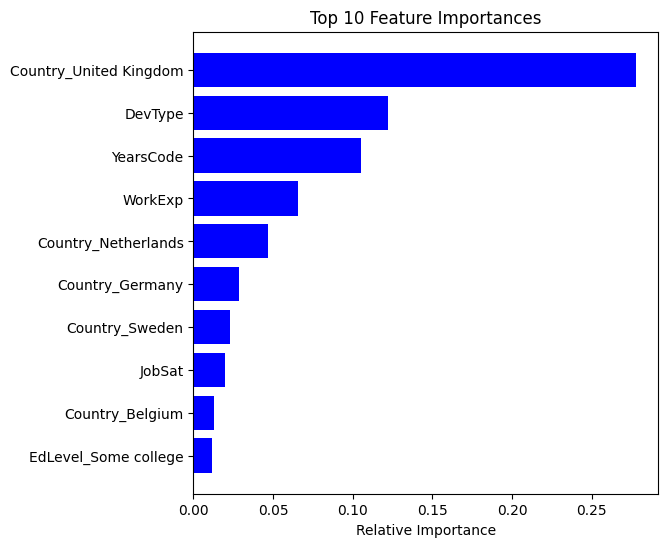

In [198]:
plot_top_feature_importance(rf_model, df_final, top_n=10, figsize=[6,6])

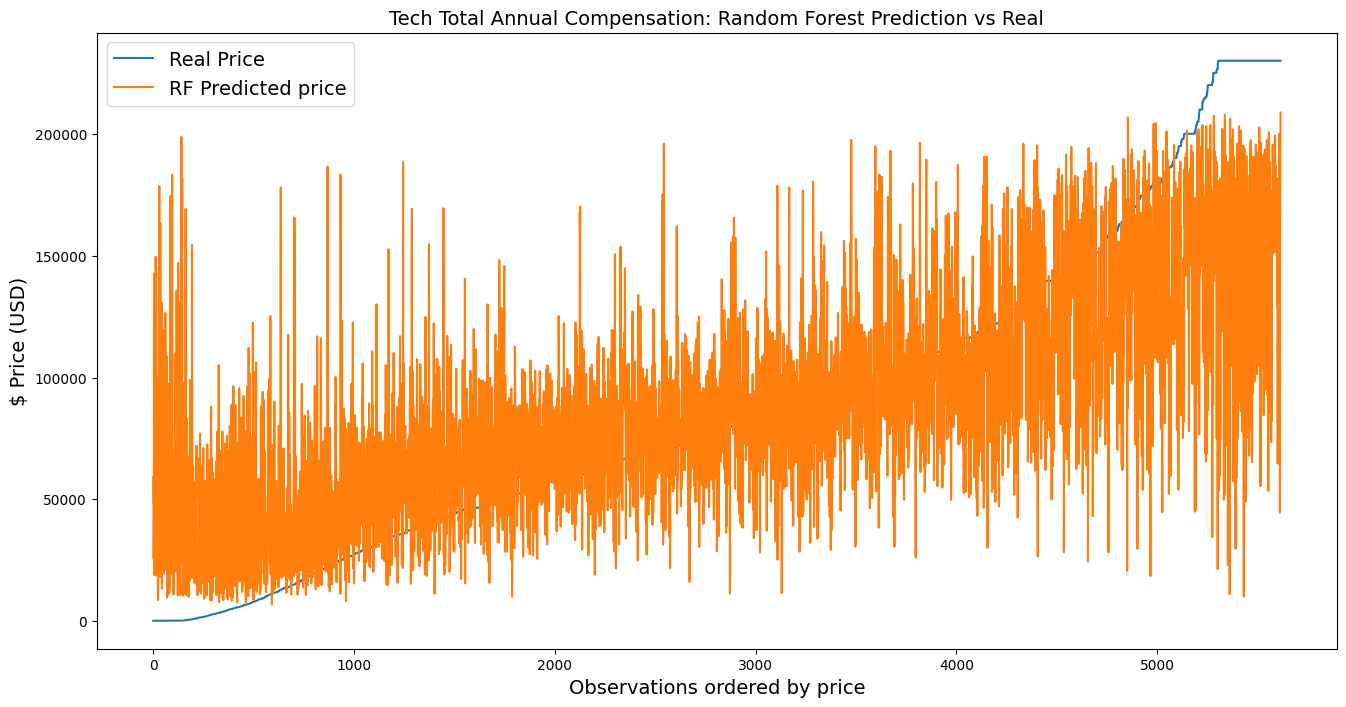

In [194]:
plot_predicted_vs_true_price(y_pred={"RF": y_pred_rf}, y_true=y_test, title="Tech Total Annual Compensation: Random Forest Prediction vs Real")

### Light GBM

In [190]:
lgb_params = {"lgb_regression__max_depth": [2, 5, 10, 50],
              "lgb_regression__learning_rate": [0.01, 0.03, 0.1, 0.5],
              "lgb_regression__num_iterations": [50, 100, 500],
              "lgb_regression__min_data_in_leaf": [2, 8, 15, 30, 50],
              "lgb_regression__min_gain_to_split": [0., 0.5, 1, 5]}

lgb_model = lgb.LGBMRegressor(random_state=seed, verbose=-1)

In [191]:
lgb_pipeline = Pipeline(steps=pipeline_steps + [("lgb_regression", lgb_model)])

lgb_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

lgb_grid_search = GridSearchCV(
    estimator=lgb_pipeline,
    param_grid=lgb_params,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    return_train_score=True,
    cv=lgb_cv
)

lgb_grid_search.fit(X_training, y_training)

lgb_model_cv_gs_results = pd.DataFrame(lgb_grid_search.cv_results_)
print("Average scoring on train set: {:.3f} +/- {:.3f}".format(lgb_model_cv_gs_results[lgb_model_cv_gs_results.rank_test_score == 1].mean_train_score.values[0], lgb_model_cv_gs_results[lgb_model_cv_gs_results.rank_test_score == 1].std_train_score.values[0])) 
print("Average scoring on validation set: {:.3f} +/- {:.3f}".format(lgb_model_cv_gs_results[lgb_model_cv_gs_results.rank_test_score == 1].mean_test_score.values[0], lgb_model_cv_gs_results[lgb_model_cv_gs_results.rank_test_score == 1].std_test_score.values[0]))

print()

lgb_cv_gs_best_params = lgb_grid_search.best_params_
print("Best hyperparameters:", lgb_cv_gs_best_params)

Average scoring on train set: -35764.389 +/- 209.194
Average scoring on validation set: -41493.606 +/- 1042.781

Best hyperparameters: {'lgb_regression__learning_rate': 0.03, 'lgb_regression__max_depth': 50, 'lgb_regression__min_data_in_leaf': 30, 'lgb_regression__min_gain_to_split': 0.0, 'lgb_regression__num_iterations': 500}


In [ ]:
# lgb_cv_gs_best_params = {'lgb_regression__learning_rate': 0.03, 'lgb_regression__max_depth': 50, 'lgb_regression__min_data_in_leaf': 30, 'lgb_regression__min_gain_to_split': 0.0, 'lgb_regression__num_iterations': 500}

In [193]:
lgb_model.set_params(max_depth = lgb_cv_gs_best_params["lgb_regression__max_depth"],
                     learning_rate = lgb_cv_gs_best_params["lgb_regression__learning_rate"],
                     num_iterations = lgb_cv_gs_best_params["lgb_regression__num_iterations"],
                     min_data_in_leaf = lgb_cv_gs_best_params["lgb_regression__min_data_in_leaf"],
                     min_gain_to_split = lgb_cv_gs_best_params["lgb_regression__min_gain_to_split"])

lgb_pipeline.fit(X_training, y_training)

y_pred_lbg = lgb_pipeline.predict(X_test)

print("R-squared on training set: {:.3f}".format(lgb_pipeline.score(X_training, y_training)))
print("R-squared on test set: {:.3f}".format(lgb_pipeline.score(X_test, y_test)))

print("Explained variance score: {:.3f}".format(explained_variance_score(y_test, y_pred_lbg)))
print("Mean absolute error (MAE): {:.3f}".format(mean_absolute_error(y_test, y_pred_lbg)))
print("Mean squared error (MSE): {:.3f}".format(mean_squared_error(y_test, y_pred_lbg)))
print("Root mean squared error (RMSE): {:.3f}".format(root_mean_squared_error(y_test, y_pred_lbg)))

c:\Projetos\analysis-tech-careers\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Projetos\analysis-tech-careers\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


R-squared on training set: 0.659
R-squared on test set: 0.552
Explained variance score: 0.552
Mean absolute error (MAE): 29836.836
Mean squared error (MSE): 1777155518.299
Root mean squared error (RMSE): 42156.322


c:\Projetos\analysis-tech-careers\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
lgb_params = {"max_depth": [2, 5, 10, 50],
              "learning_rate": [0.01, 0.03, 0.1, 0.5],
              "num_iterations": [50, 100, 500, 700],
              "min_data_in_leaf": [2, 8, 15, 30, 50],
              "min_gain_to_split": [0., 0.5, 1, 5]}

lgb_model = lgb.LGBMRegressor(random_state=seed, verbose=-1)

In [ ]:
lgb_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

lgb_grid_search = GridSearchCV(
	estimator=cast(BaseEstimator, lgb_model),
	param_grid=lgb_params,
    scoring="neg_root_mean_squared_error",
	n_jobs=-1,
	return_train_score=True,
	cv=lgb_cv
)

lgb_grid_search.fit(X_training, y_training)

lgb_model_cv_gs_results = pd.DataFrame(lgb_grid_search.cv_results_)
print("Average scoring on train set: {:.3f} +/- {:.3f}".format(lgb_model_cv_gs_results[lgb_model_cv_gs_results.rank_test_score == 1].mean_train_score.values[0], lgb_model_cv_gs_results[lgb_model_cv_gs_results.rank_test_score == 1].std_train_score.values[0])) 
print("Average scoring on validation set: {:.3f} +/- {:.3f}".format(lgb_model_cv_gs_results[lgb_model_cv_gs_results.rank_test_score == 1].mean_test_score.values[0], lgb_model_cv_gs_results[lgb_model_cv_gs_results.rank_test_score == 1].std_test_score.values[0]))

print()

lgb_cv_gs_best_params = lgb_grid_search.best_params_
print("Best hyperparameters:", lgb_cv_gs_best_params)

In [ ]:
lgb_model.set_params(max_depth = lgb_cv_gs_best_params["max_depth"],
                     learning_rate = lgb_cv_gs_best_params["learning_rate"],
                     num_iterations = lgb_cv_gs_best_params["num_iterations"],
                     min_data_in_leaf = lgb_cv_gs_best_params["min_data_in_leaf"],
                     min_gain_to_split = lgb_cv_gs_best_params["min_gain_to_split"])

lgb_model.fit(X_training, y_training)

y_pred_lbg = lgb_model.predict(X_test)

print("R-squared on training set: {:.3f}".format(lgb_model.score(X_training, y_training)))  # type: ignore
print("R-squared on test set: {:.3f}".format(lgb_model.score(X_test, y_test))) # type: ignore

print("Explained variance score: {:.3f}".format(explained_variance_score(y_test, y_pred_lbg))) # type: ignore
print("Mean absolute error (MAE): {:.3f}".format(mean_absolute_error(y_test, y_pred_lbg))) # type: ignore
print("Mean squared error (MSE): {:.3f}".format(mean_squared_error(y_test, y_pred_lbg))) # type: ignore
print("Root mean squared error (RMSE): {:.3f}".format(root_mean_squared_error(y_test, y_pred_lbg))) # type: ignore

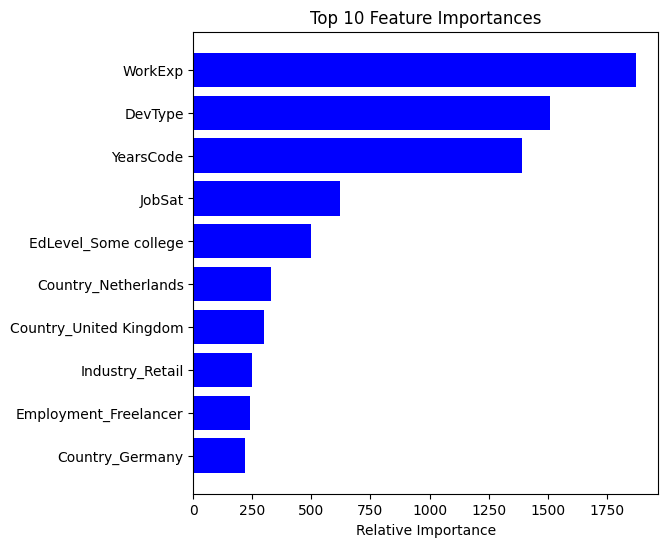

In [202]:
plot_top_feature_importance(lgb_model, df_final, top_n=10, figsize=[6,6])

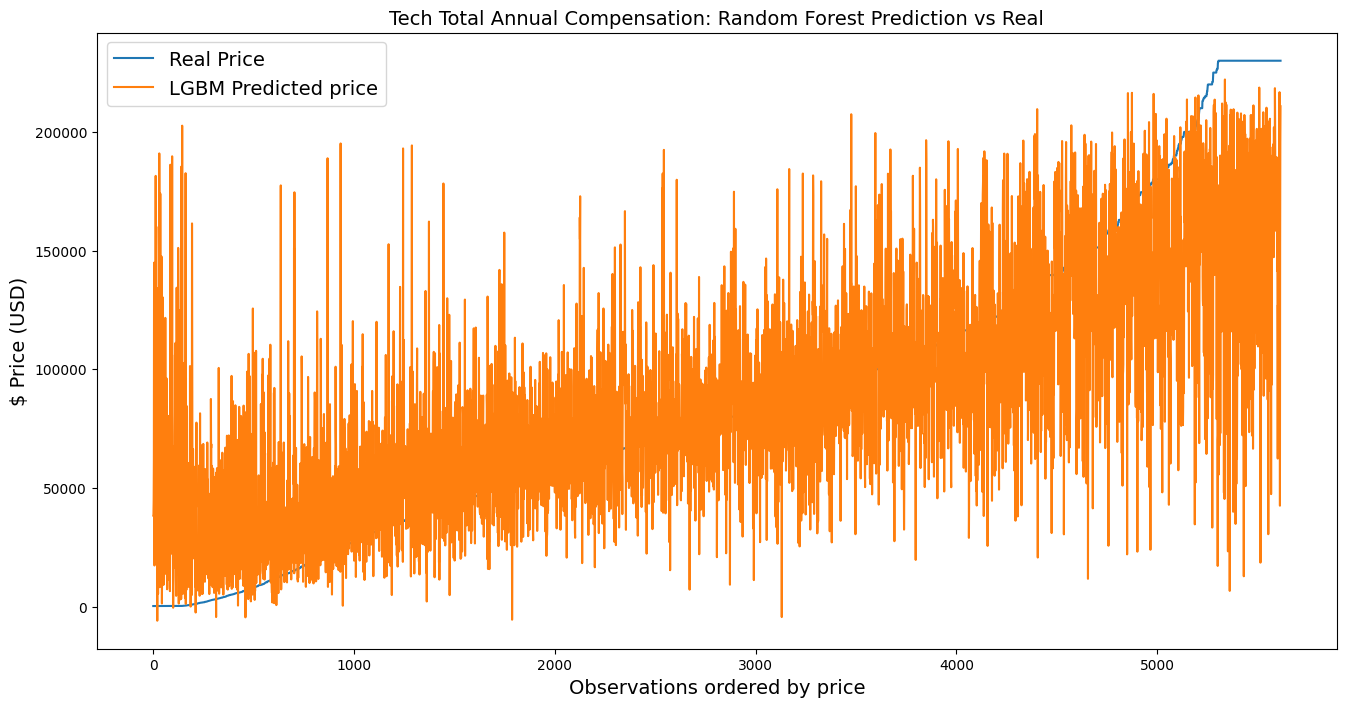

In [197]:
plot_predicted_vs_true_price(y_pred={"LGBM": y_pred_lbg}, y_true=y_test, title="Tech Total Annual Compensation: Random Forest Prediction vs Real")

<a id="evaluation"></a>
## Evaluation

<a id="conclusion"></a>
## Conclusion

Interpretation of the data for your specific case is up to you.
Remember the predictions are based upon a survey and could be biased. Furthermore the model does not use all the possible features and the final plots show only the median for all results. 